## **빅데이터 처리 과제**
#게임 트랜드 조사

In [1]:
import requests
from bs4 import BeautifulSoup
import json
import pandas as pd
import datetime
import os


## 그래프 한글 글꼴 설치

실행후 런타임 다시시작

In [3]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-460
Use 'sudo apt autoremove' to remove it.
The following NEW packages will be installed:
  fonts-nanum
0 upgraded, 1 newly installed, 0 to remove and 20 not upgraded.
Need to get 9,604 kB of archives.
After this operation, 29.5 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-nanum all 20170925-1 [9,604 kB]
Fetched 9,604 kB in 1s (8,414 kB/s)
debconf: unable to initialize frontend: Dialog
debconf: (No usable dialog-like program is installed, so the dialog based frontend cannot be used. at /usr/share/perl5/Debconf/FrontEnd/Dialog.pm line 76, <> line 1.)
debconf: falling back to frontend: Readline
debconf: unable to initialize frontend: Readline
debconf: (This frontend requires a controlling tty.)
debconf: falling back to frontend: Teletyp

In [2]:
import matplotlib.pyplot as plt
import matplotlib as mpl
plt.rc('font', family='NanumGothic')

## 신규 인기게임 크롤링
게임 타이틀 크롤링(데이터 확인용)

In [79]:
# 신규 인기게임 타이틀
result_new = []
for start in range(0, 100, 50):
    URL = 'https://store.steampowered.com/search/results/?query&start='+str(start)+'&count=50&sort_by=Released_DESC&snr=1_7_7_popularnew_7&filter=popularnew&os=win&infinite=1'
    res = requests.get(URL)
    json_data = res.json()
    soup = BeautifulSoup(json_data['results_html'], 'html.parser')
    # steam = soup.select_one('#search_resultsRows')
    titles = soup.select('.col.search_name.ellipsis .title')
    
    for title in titles:
        result_new.append(title.text)
result_new[:10]

['The Scarlet Demonslayer',
 'Arcadie: Second-Born',
 'Choo-Choo Charles',
 'Solar Ash',
 'JellyCar Worlds',
 'Chained Echoes',
 'IXION',
 'Zombie Cure Lab',
 'Hubris',
 "Assassin's Creed Valhalla"]


게임 사이트 id 크롤링

In [80]:
# 신규 인기게임 태그
id_list_new = []
for start in range(0, 400, 50):
    URL = 'https://store.steampowered.com/search/results/?query&start='+str(start)+'&count=50&sort_by=Released_DESC&snr=1_7_7_popularnew_7&filter=popularnew&os=win&infinite=1'
    res = requests.get(URL)
    json_data = res.json()
    soup = BeautifulSoup(json_data['results_html'], 'html.parser')
    appids = soup.select('a')
    
    for appid in appids:
        idtag = appid.attrs['data-ds-appid']
        id_list_new.append(idtag)
id_list_new[:10]

['2123140',
 '2196980',
 '1766740',
 '1867530',
 '1740930',
 '1229240',
 '1113120',
 '1620290',
 '1265800',
 '2208920']

## 인기게임 크롤링
게임 타이틀 크롤링(데이터 확인용)

In [16]:
# 전세계 최다 판매 타이틀
result_top = []
for start in range(0, 100, 50):
    URL = 'https://store.steampowered.com/search/results/?query&start='+str(start)+'&count=50&snr=1_7_7_globaltopsellers_7&filter=globaltopsellers&os=win&infinite=1'
    res = requests.get(URL)
    json_data = res.json()
    soup = BeautifulSoup(json_data['results_html'], 'html.parser')
    # steam = soup.select_one('#search_resultsRows')
    titles = soup.select('.col.search_name.ellipsis .title')
    
    for title in titles:
        result_top.append(title.text)
result_top[:20]

['Steam Deck',
 'Counter-Strike: Global Offensive',
 'Call of Duty®: Modern Warfare® II',
 'Apex Legends™',
 'EA SPORTS™ FIFA 23',
 'PUBG: BATTLEGROUNDS',
 'Dwarf Fortress',
 'Dota 2',
 'Red Dead Redemption 2',
 'Cyberpunk 2077',
 'Destiny 2',
 'Warhammer 40,000: Darktide',
 "Assassin's Creed Valhalla",
 'Anno 1800',
 'ELDEN RING',
 'Lost Ark',
 'World of Warships',
 'Choo-Choo Charles',
 'Path of Exile',
 'Valve Index® Headset']


게임 사이트 id 크롤링

In [18]:
# 인기 판매 타이틀
id_list_top = []
for start in range(0, 400, 50):
    URL = 'https://store.steampowered.com/search/results/?query&start='+str(start)+'&count=50&snr=1_7_7_globaltopsellers_7&filter=globaltopsellers&os=win&infinite=1'
    res = requests.get(URL)
    json_data = res.json()
    soup = BeautifulSoup(json_data['results_html'], 'html.parser')
    appids = soup.select('a')
    
    titles = soup.select('.col.search_name.ellipsis .title')

    for appid in appids:
        idtag = appid.attrs['data-ds-appid']
        id_list_top.append(idtag)

id_list_top[:10]

['1675200',
 '730',
 '1938090',
 '1172470',
 '1811260',
 '578080',
 '975370',
 '570',
 '1174180',
 '1091500']

## 인기 출시 예정 게임 크롤링
게임 타이틀 크롤링(데이터 확인용)

In [ ]:
# 인기 출시 예정 타이틀
result_coming = []
for start in range(0, 100, 50):
    URL = 'https://store.steampowered.com/search/results/?query&start='+str(start)+'&count=50&snr=1_7_7_popularcomingsoon_7&filter=popularcomingsoon&os=win&infinite=1'
    res = requests.get(URL)
    json_data = res.json()
    soup = BeautifulSoup(json_data['results_html'], 'html.parser')
    # steam = soup.select_one('#search_resultsRows')
    titles = soup.select('.col.search_name.ellipsis .title')
    
    for title in titles:
        result_coming.append(title.text)
result_coming[:20]

['Choo-Choo Charles',
 'STALCRAFT',
 'The Scarlet Demonslayer',
 'Wavetale',
 '人窟日记 The Grotto Diary',
 'High On Life',
 'Cities: Skylines - Financial Districts',
 'Cities: Skylines - Content Creator Pack: Map Pack 2',
 'Planet Zoo: Grasslands Animal Pack',
 'Hunt: Showdown – Frau Perchta',
 'Master of Magic',
 'CRISIS CORE –FINAL FANTASY VII– REUNION',
 'Garden Galaxy',
 'Starcom: Unknown Space',
 'Lil Gator Game',
 'Aka',
 'Melatonin',
 'Frontier Hunter: Erza’s Wheel of Fortune',
 'Noun Town: VR Language Learning',
 'BLACKTAIL']

게임 사이트 id 크롤링

In [82]:
# 인기 출시 예정 태그
id_list_coming = []
for start in range(0, 400, 50):
    URL = 'https://store.steampowered.com/search/results/?query&start='+str(start)+'&count=50&snr=1_7_7_popularcomingsoon_7&filter=popularcomingsoon&os=win&infinite=1'
    res = requests.get(URL)
    json_data = res.json()
    soup = BeautifulSoup(json_data['results_html'], 'html.parser')
    appids = soup.select('a')
    
    titles = soup.select('.col.search_name.ellipsis .title')

    for appid in appids:
        idtag = appid.attrs['data-ds-appid']
        id_list_coming.append(idtag)
id_list_coming[:10]

['1823930',
 '2124420',
 '1602300',
 '1583230',
 '2148901',
 '2148903',
 '2199210',
 '2160330',
 '1623070',
 '1608070']

## 크롤링 하여 모은 id로 태그 추출후 저장

In [83]:
new_single_tag_df = pd.DataFrame()
new_double_tag_df = pd.DataFrame()

top_single_tag_df = pd.DataFrame()
top_double_tag_df = pd.DataFrame()
top_rank_df=pd.DataFrame()

coming_single_tag_df = pd.DataFrame()
coming_double_tag_df = pd.DataFrame()

#최신
for i in range(len(id_list_new)):

    appidURL = 'https://store.steampowered.com/app/'+id_list_new[i]
    res = requests.get(appidURL)
    soup = BeautifulSoup(res.text, 'html.parser')

    single_tag =[]
    d_today= datetime.date.today()

    #싱글태그 데이터프레임 + 배열
    if(soup.select_one('.glance_tags.popular_tags') != None):
      tags = soup.select_one('.glance_tags.popular_tags').text.strip().replace('\t','').replace('\r','').replace('+','')
      for tag in tags.split('\n'):
          single_tag.append(tag)
          taged={'date': d_today , 'tag' : tag}
          new_single_tag_df = new_single_tag_df.append(taged,ignore_index=True)

      single_tag.sort()
      
      #더블 태그 데이터 프레임
      for i in range(len(single_tag)):
        for j in range(i+1,len(single_tag)):
          double_tag = single_tag[i] + " - "+ single_tag[j]
          double_taged = {'date': d_today, 'tag':double_tag}
          new_double_tag_df = new_double_tag_df.append(double_taged,ignore_index=True)


#최다 판매
rank=1;
for i in range(len(id_list_top)):

    appidURL = 'https://store.steampowered.com/app/'+id_list_top[i]
    res = requests.get(appidURL)
    soup = BeautifulSoup(res.text, 'html.parser')

    single_tag =[]
    d_today= datetime.date.today()

    #싱글태그 데이터프레임 + 배열
    if(soup.select_one('.glance_tags.popular_tags') != None):
      tags = soup.select_one('.glance_tags.popular_tags').text.strip().replace('\t','').replace('\r','').replace('+','')
      for tag in tags.split('\n'):
          single_tag.append(tag)
          taged={'date': d_today , 'tag' : tag}
          top_single_tag_df = top_single_tag_df.append(taged,ignore_index=True)
      single_tag.sort()
      
      #더블 태그 데이터 프레임
      for i in range(len(single_tag)):
        for j in range(i+1,len(single_tag)):
          double_tag = single_tag[i] + " - "+ single_tag[j]
          double_taged = {'date': d_today, 'tag':double_tag}
          top_double_tag_df = top_double_tag_df.append(double_taged,ignore_index=True)

        

      #게임 순위
      title = soup.select_one('#appHubAppName').text
      ranked = {'date' : d_today, 'title' : title, 'rank':rank}
      rank=rank+1
      top_rank_df = top_rank_df.append(ranked, ignore_index=True)


#출시예정
for i in range(len(id_list_coming)):

    appidURL = 'https://store.steampowered.com/app/'+id_list_coming[i]
    res = requests.get(appidURL)
    soup = BeautifulSoup(res.text, 'html.parser')

    single_tag =[]
    d_today= datetime.date.today()

    #싱글태그 데이터프레임 + 배열
    if(soup.select_one('.glance_tags.popular_tags') != None):
      tags = soup.select_one('.glance_tags.popular_tags').text.strip().replace('\t','').replace('\r','').replace('+','')
      for tag in tags.split('\n'):
          single_tag.append(tag)
          taged={'date': d_today , 'tag' : tag}
          coming_single_tag_df = coming_single_tag_df.append(taged,ignore_index=True)

      single_tag.sort()
      
      #더블 태그 데이터 프레임
      for i in range(len(single_tag)):
        for j in range(i+1,len(single_tag)):
          double_tag = single_tag[i] + " - "+ single_tag[j]
          double_taged = {'date': d_today, 'tag':double_tag}
          coming_double_tag_df = coming_double_tag_df.append(double_taged,ignore_index=True)

        

file_name = ['new_tag_single.csv','new_tag_double.csv',
             'top_tag_single.csv','top_tag_double.csv','top_rank.csv',
             'coming_tag_single.csv','coming_tag_double.csv']
dataf=[new_single_tag_df, new_double_tag_df, 
       top_single_tag_df, top_double_tag_df, top_rank_df,
       coming_single_tag_df, coming_double_tag_df,]

for n, d in zip(file_name, dataf):
  if os.path.isfile(n):
    d.to_csv(n,mode = 'a', encoding="utf-8", index=False, header=None)
  else:
    d.to_csv(n,mode = 'a', encoding="utf-8", index=False)

## 최신 게임 싱글 태그 분석

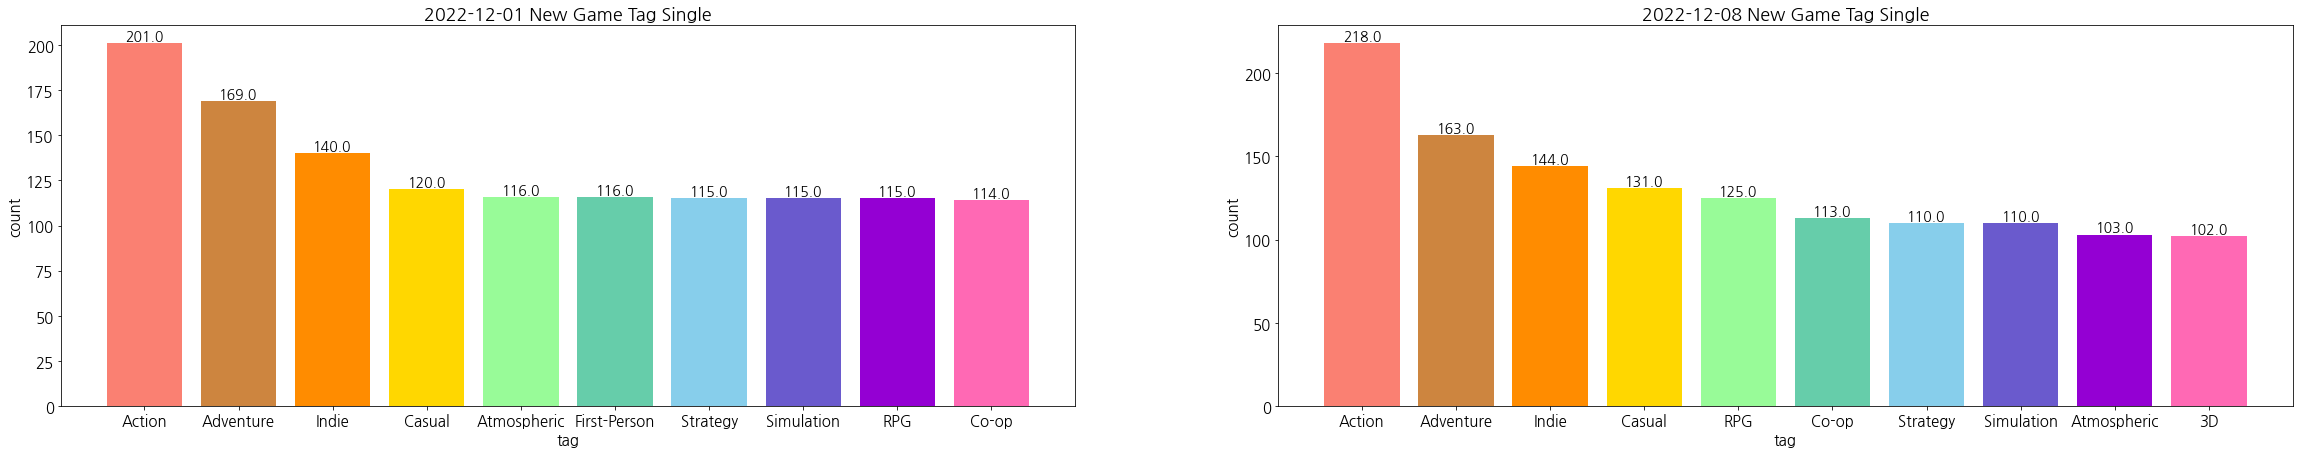

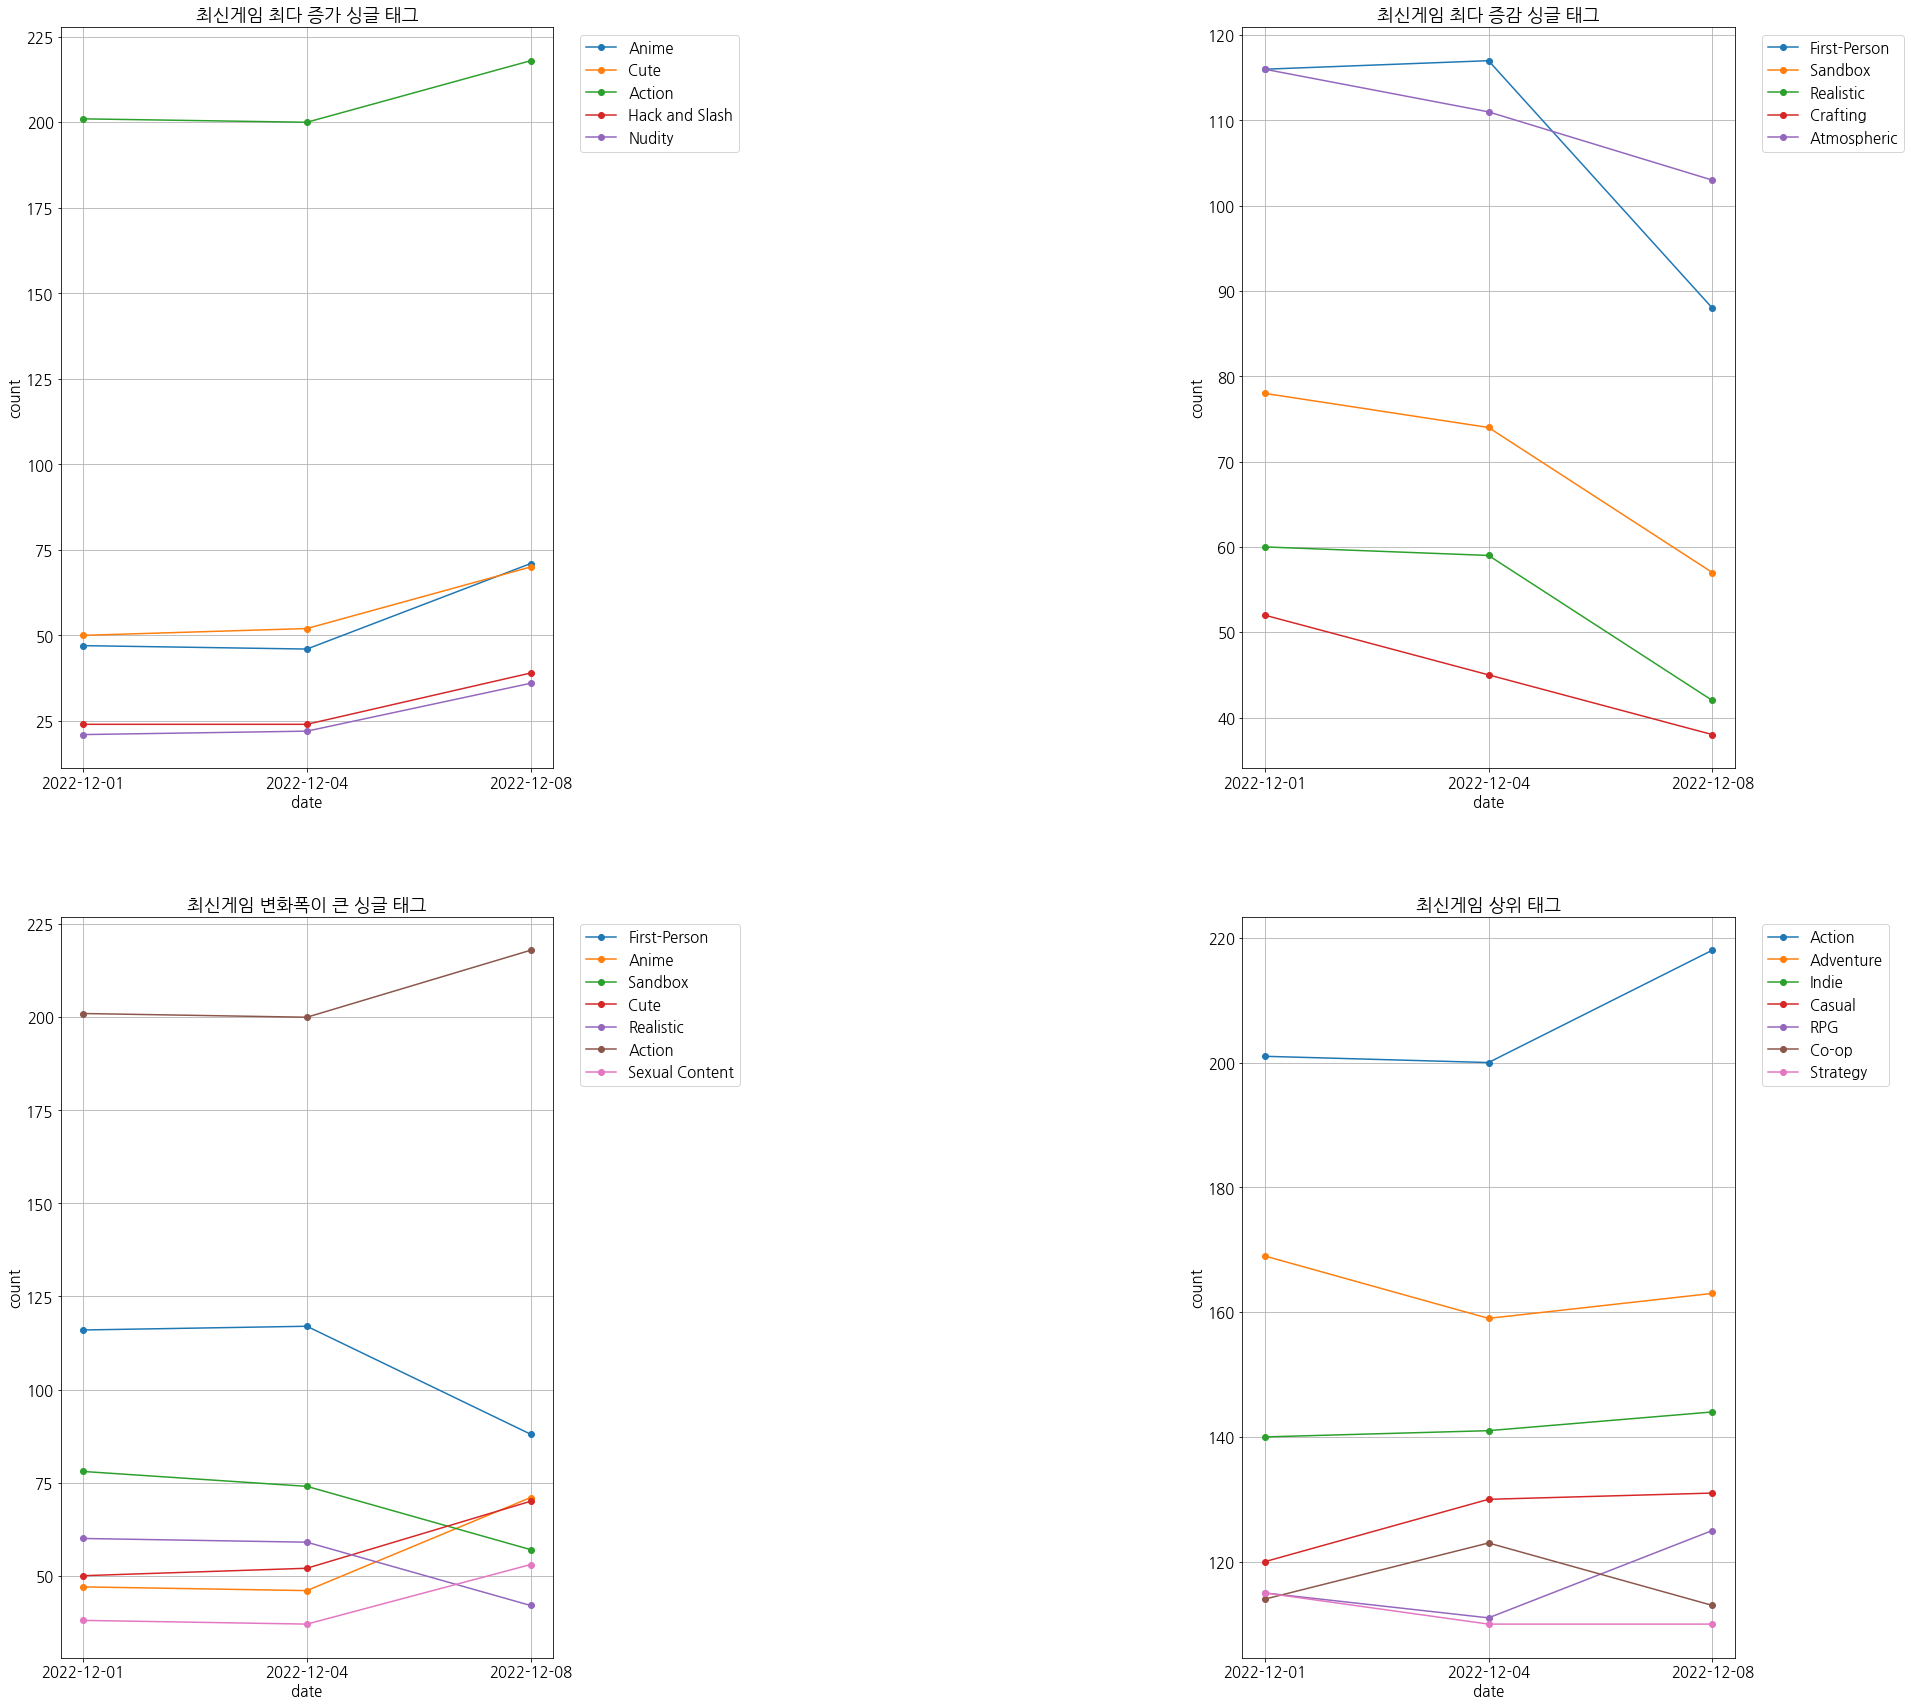

In [19]:
import matplotlib.pyplot as plt
plt.rc('font',size = 15)

deleteTag = ['Singleplayer','Multiplayer','Free to Play','Online Co-Op','Great Soundtrack'] #제거할 태그

new_single_df = pd.read_csv('/content/new_tag_single.csv')

for k in deleteTag:
  spec=new_single_df[new_single_df['tag']==k].index
  new_single_df.drop(spec,inplace=True)

mask=(new_single_df['date']=='2022-12-01') #일주일 전 싱글태그
former =  new_single_df[mask]

mask = (new_single_df['date']=='2022-12-04')
middle = new_single_df[mask]

mask=(new_single_df['date']=='2022-12-08') # 현재 싱글 태그
now =  new_single_df[mask]

former_top = former.tag.value_counts().head(10).rename_axis('tag').to_frame(name='2022-12-01') #개수가 많은 10개의 태그 가져오기
now_top = now.tag.value_counts().head(10).rename_axis('tag').to_frame(name='2022-12-08')

colors=['salmon','peru','darkorange','gold','palegreen','mediumaquamarine','skyblue','slateblue','darkviolet','hotpink']

fig=plt.figure(figsize=(40,7))

ax1=fig.add_subplot(1,2,1) #전주 태그 개수 그래프
ax1.set_title('2022-12-01 New Game Tag Single')
ax1.set(ylabel='count',xlabel='tag')

for rect in ax1.bar(former_top.index,former_top['2022-12-01'],color=colors): #bar 생성 및 개수 텍스트 표시
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 14)


ax2=fig.add_subplot(1,2,2)  #현재 태그 개수 그래프
ax2.set_title('2022-12-08 New Game Tag Single')
ax2.set(ylabel='count',xlabel='tag')

for rect in ax2.bar(now_top.index, now_top['2022-12-08'], color=colors): #bar 생성 및 개수 텍스트 표시
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 14)

fig.show()


#카운트 한것을 기반으로 새로운 DataFrame 생성
former = former.tag.value_counts().rename_axis('tag').to_frame(name='2022-12-01')
middle = middle.tag.value_counts().rename_axis('tag').to_frame(name='2022-12-04') #전주와 현재 사이의 넣을 데이터
now = now.tag.value_counts().rename_axis('tag').to_frame(name='2022-12-08')
#3개의 데이터 프레임을 합침
compare = pd.merge(former, middle, how='outer', on='tag')
compare = pd.merge(compare,now, how='outer', on='tag')

top_single=compare.sort_values(by='2022-12-08',ascending=[False]).head(7) #현재 태그개수 상위 7개
top_single = top_single.transpose() #그래프 표현을 위해 행 열 바꾸기


fig2=plt.figure(figsize=(30,30))

ax3=fig2.add_subplot(2,3,6)
ax3.set_title('최신게임 상위 태그')
ax3.plot(top_single.index,top_single.values, marker='o')
ax3.grid(True)
ax3.legend(bbox_to_anchor=(1.04, 1), labels=top_single.columns)
ax3.set(ylabel='count',xlabel='date')

compare = compare.fillna(0) #Nan값을 모두 0으로 변경
compare['compare']=compare['2022-12-08'] - compare['2022-12-01']#전주와 현재의 태그 수의 차이를 넣는 컬럼 추가
top_compare_single=compare.sort_values(by=['compare'],ascending=[False]).head(5) #가장 많은 수가 늘어난 태그 5가지
bottom_compare_single=compare.sort_values(by=['compare'],ascending=[True]).head(5) #가장 많이 줄어든 태그 5가지

top_compare_single = top_compare_single.drop(['compare'],axis=1).transpose() #그래프화를 위해 행열 바꾸기

ax4=fig2.add_subplot(2,3,1)
ax4.set_title('최신게임 최다 증가 싱글 태그')
ax4.plot(top_compare_single.index,top_compare_single.values, marker='o')
ax4.grid(True)
ax4.legend(bbox_to_anchor=(1.04, 1), labels=top_compare_single.columns)
ax4.set(ylabel='count',xlabel='date')

bottom_compare_single=bottom_compare_single.drop(['compare'],axis=1).transpose() #그래프화를 위해 행열 바꾸기
ax5=fig2.add_subplot(2,3,3)
ax5.set_title('최신게임 최다 증감 싱글 태그')
ax5.plot(bottom_compare_single.index,bottom_compare_single.values, marker='o')
ax5.grid(True)
ax5.legend(bbox_to_anchor=(1.04, 1), labels=bottom_compare_single.columns)
ax5.set(ylabel='count',xlabel='date')

def absolute(x): # 변화값의 절대값을 구하기 위한 함수
  if(x<0):
    return -x
  return x

compare['compare']=compare.apply(lambda x:absolute(x['compare']),axis=1) #개수 변화값을 절대값으로 변경
compare= compare.sort_values(by='compare',ascending=[False]).head(7) #태그 개수의 변화가 큰 태그 7개

compare = compare.drop(['compare'],axis=1).transpose() #그래프화를 위해 행열 바꾸기
ax6=fig2.add_subplot(2,3,4)
ax6.set_title('최신게임 변화폭이 큰 싱글 태그')
ax6.plot(compare.index,compare.values, marker='o')
ax6.grid(True)
ax6.legend(bbox_to_anchor=(1.04, 1), labels=compare.columns)
ax6.set(ylabel='count',xlabel='date')

fig2.show()






## 최신 게임 더블 태그 분석

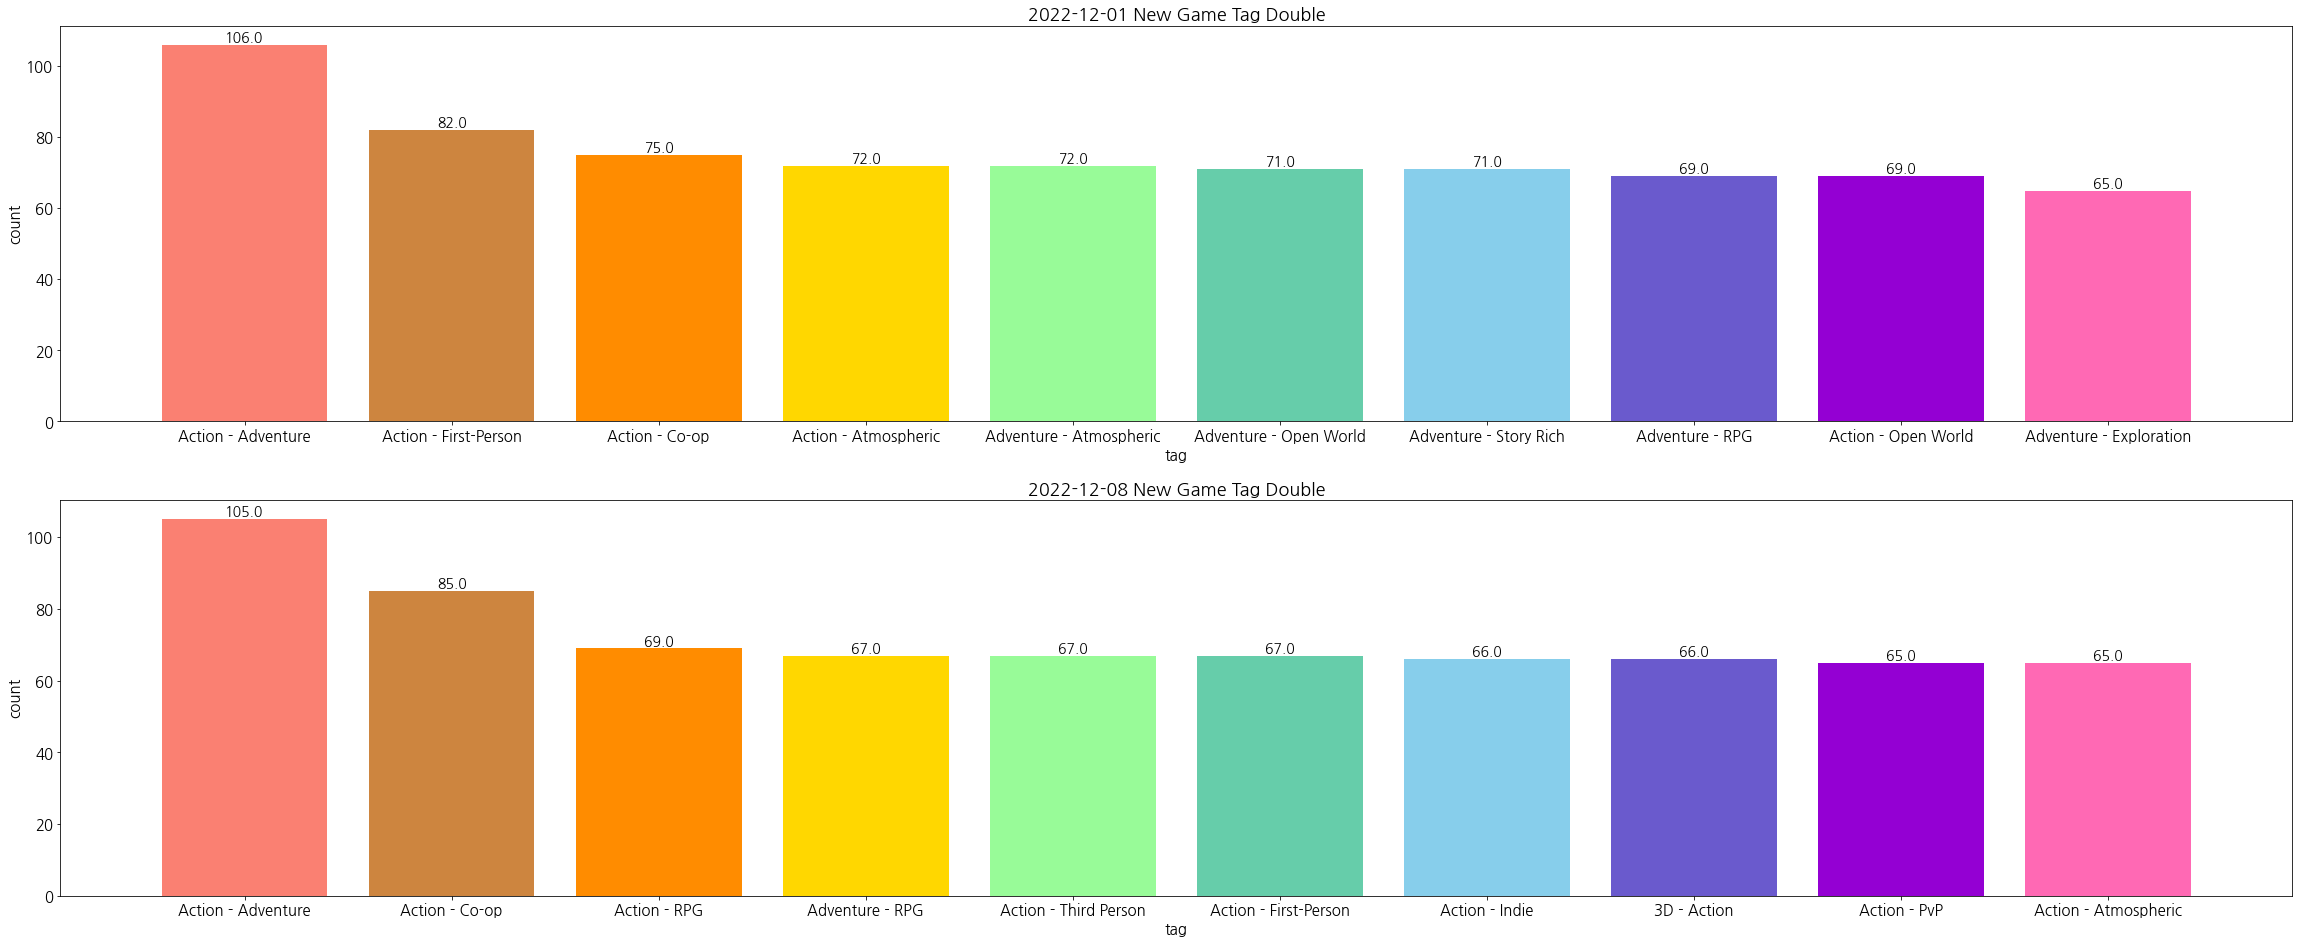

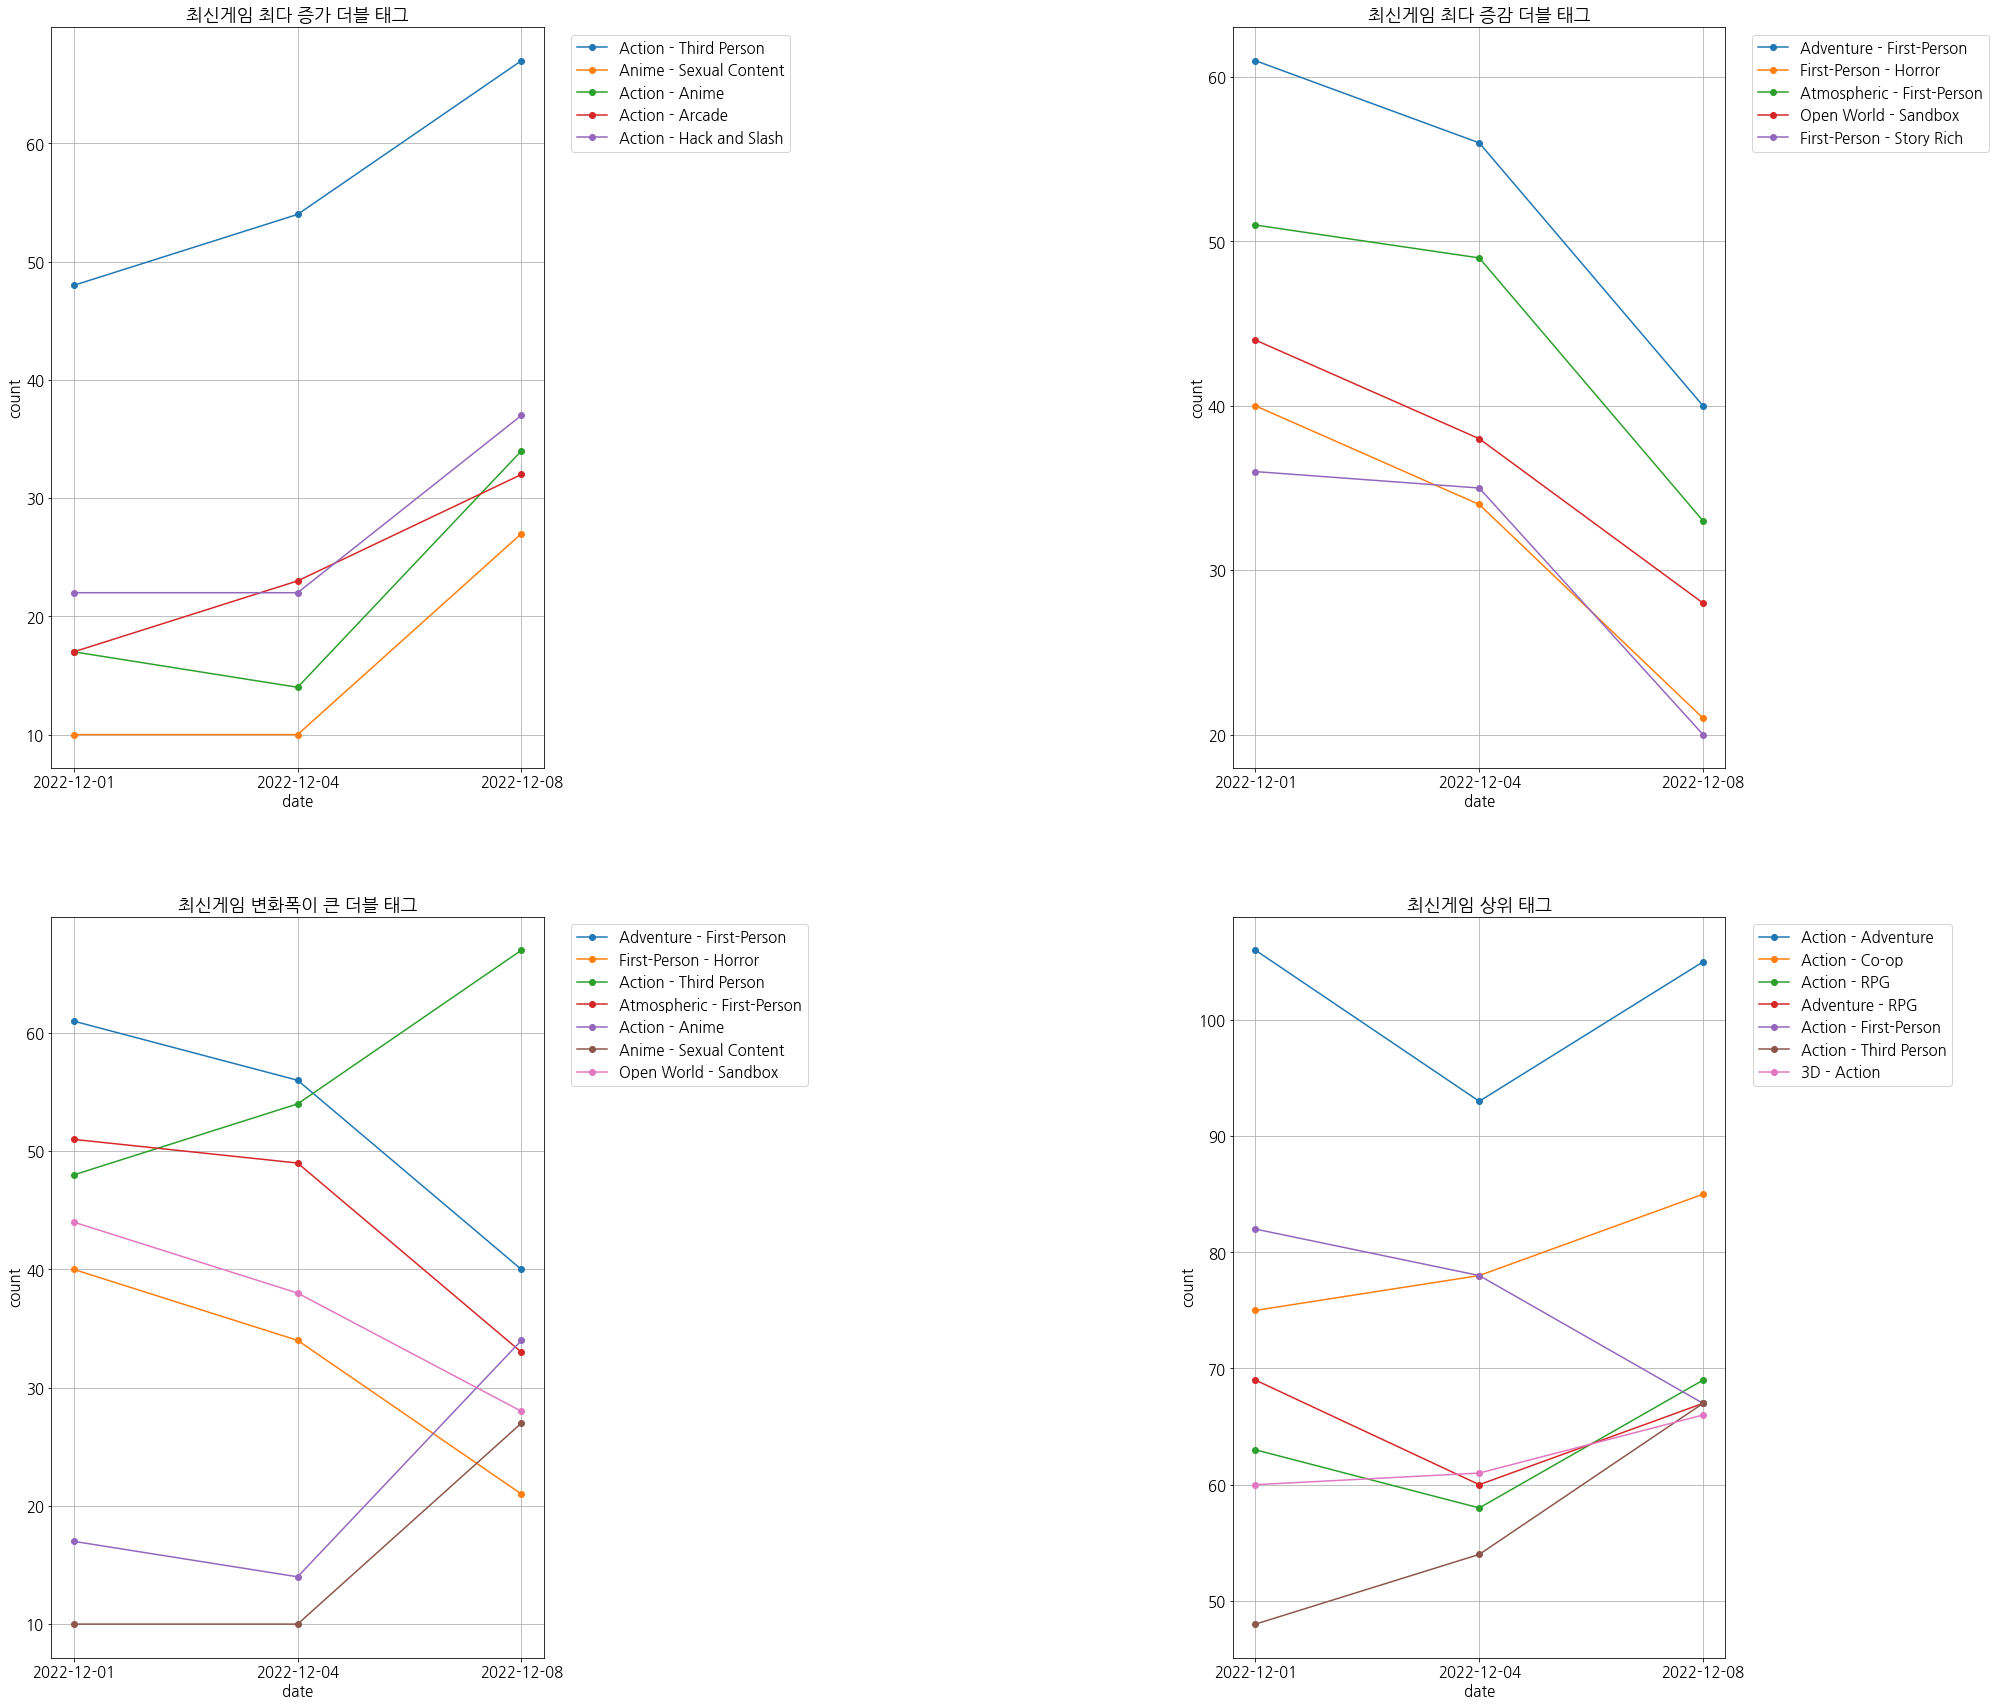

In [20]:
import matplotlib.pyplot as plt
plt.rc('font',size = 15)

deleteTag = ['Singleplayer','Multiplayer','Free to Play','Online Co-Op','Great Soundtrack'] #제거할 태그

new_double_df = pd.read_csv('/content/new_tag_double.csv')

for k in deleteTag:
  spec = new_double_df[new_double_df['tag'].str.contains(k)].index #deleteTag가 포함된 값 제거
  new_double_df.drop(spec,inplace=True)

mask=(new_double_df['date']=='2022-12-01')  #일주일 전 더블태그
former =  new_double_df[mask]

mask = (new_double_df['date']=='2022-12-04') # 중간 더블 태그
middle = new_double_df[mask]

mask=(new_double_df['date']=='2022-12-08') # 현재 더블 태그
now =  new_double_df[mask]


former_top = former.tag.value_counts().head(10).rename_axis('tag').to_frame(name='2022-12-01') #개수가 많은 10개의 태그 가져오기
now_top = now.tag.value_counts().head(10).rename_axis('tag').to_frame(name='2022-12-08')

colors=['salmon','peru','darkorange','gold','palegreen','mediumaquamarine','skyblue','slateblue','darkviolet','hotpink']

fig=plt.figure(figsize=(40,16))

ax1=fig.add_subplot(2,1,1) #전주 태그 개수 그래프
ax1.set_title('2022-12-01 New Game Tag Double')
ax1.set(ylabel='count',xlabel='tag')

for rect in ax1.bar(former_top.index,former_top['2022-12-01'],color=colors): #bar 생성 및 개수 텍스트 표시
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 14)


ax2=fig.add_subplot(2,1,2)  #현재 태그 개수 그래프
ax2.set_title('2022-12-08 New Game Tag Double')
ax2.set(ylabel='count',xlabel='tag')

for rect in ax2.bar(now_top.index, now_top['2022-12-08'], color=colors): #bar 생성 및 개수 텍스트 표시
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 14)

fig.show()

#카운트 한것을 기반으로 새로운 DataFrame 생성
former = former.tag.value_counts().rename_axis('tag').to_frame(name='2022-12-01')
middle = middle.tag.value_counts().rename_axis('tag').to_frame(name='2022-12-04') #전주와 현재 사이의 넣을 데이터
now = now.tag.value_counts().rename_axis('tag').to_frame(name='2022-12-08')
#3개의 데이터 프레임을 합침
compare = pd.merge(former, middle, how='outer', on='tag')
compare = pd.merge(compare,now, how='outer', on='tag')

top_double=compare.sort_values(by='2022-12-08',ascending=[False]).head(7) #현재 태그개수 상위 7개
top_double = top_double.transpose() #그래프 표현을 위해 행 열 바꾸기

fig2=plt.figure(figsize=(30,30))

ax3=fig2.add_subplot(2,3,6)
ax3.set_title('최신게임 상위 태그')
ax3.plot(top_double.index,top_double.values, marker='o')
ax3.grid(True)
ax3.legend(bbox_to_anchor=(1.04, 1), labels=top_double.columns)
ax3.set(ylabel='count',xlabel='date')

compare = compare.fillna(0) #Nan값을 모두 0으로 변경
compare['compare']=compare['2022-12-08'] - compare['2022-12-01'] #전주와 현재의 태그 수의 차이를 넣는 컬럼 추가
top_compare_double=compare.sort_values(by=['compare'],ascending=[False]).head(5) #가장 많은 수가 늘어난 태그 5가지
bottom_compare_double=compare.sort_values(by=['compare'],ascending=[True]).head(5) #가장 많이 줄어든 태그 5가지

top_compare_double = top_compare_double.drop(['compare'],axis=1).transpose() #그래프화를 위해 행열 바꾸기
ax4=fig2.add_subplot(2,3,1)
ax4.set_title('최신게임 최다 증가 더블 태그')
ax4.plot(top_compare_double.index,top_compare_double.values, marker='o')
ax4.grid(True)
ax4.legend(bbox_to_anchor=(1.04, 1), labels=top_compare_double.columns)
ax4.set(ylabel='count',xlabel='date')

bottom_compare_double=bottom_compare_double.drop(['compare'],axis=1).transpose() #그래프화를 위해 행열 바꾸기
ax5=fig2.add_subplot(2,3,3)
ax5.set_title('최신게임 최다 증감 더블 태그')
ax5.plot(bottom_compare_double.index,bottom_compare_double.values, marker='o')
ax5.grid(True)
ax5.legend(bbox_to_anchor=(1.55, 1), labels=bottom_compare_double.columns)
ax5.set(ylabel='count',xlabel='date')

def absolute(x): # 변화값의 절대값을 구하기 위한 함수
  if(x<0):
    return -x
  return x

compare['compare']=compare.apply(lambda x:absolute(x['compare']),axis=1) #개수 변화값을 절대값으로 변경
compare= compare.sort_values(by='compare',ascending=[False]).head(7) #태그 개수의 변화가 큰 태그 7개

compare = compare.drop(['compare'],axis=1).transpose() #그래프화를 위해 행열 바꾸기
ax6=fig2.add_subplot(2,3,4)
ax6.set_title('최신게임 변화폭이 큰 더블 태그')
ax6.plot(compare.index,compare.values, marker='o')
ax6.grid(True)
ax6.legend(bbox_to_anchor=(1.04, 1), labels=compare.columns)
ax6.set(ylabel='count',xlabel='date')

fig2.show()




## 출시 예정 게임 싱글 태그 분석

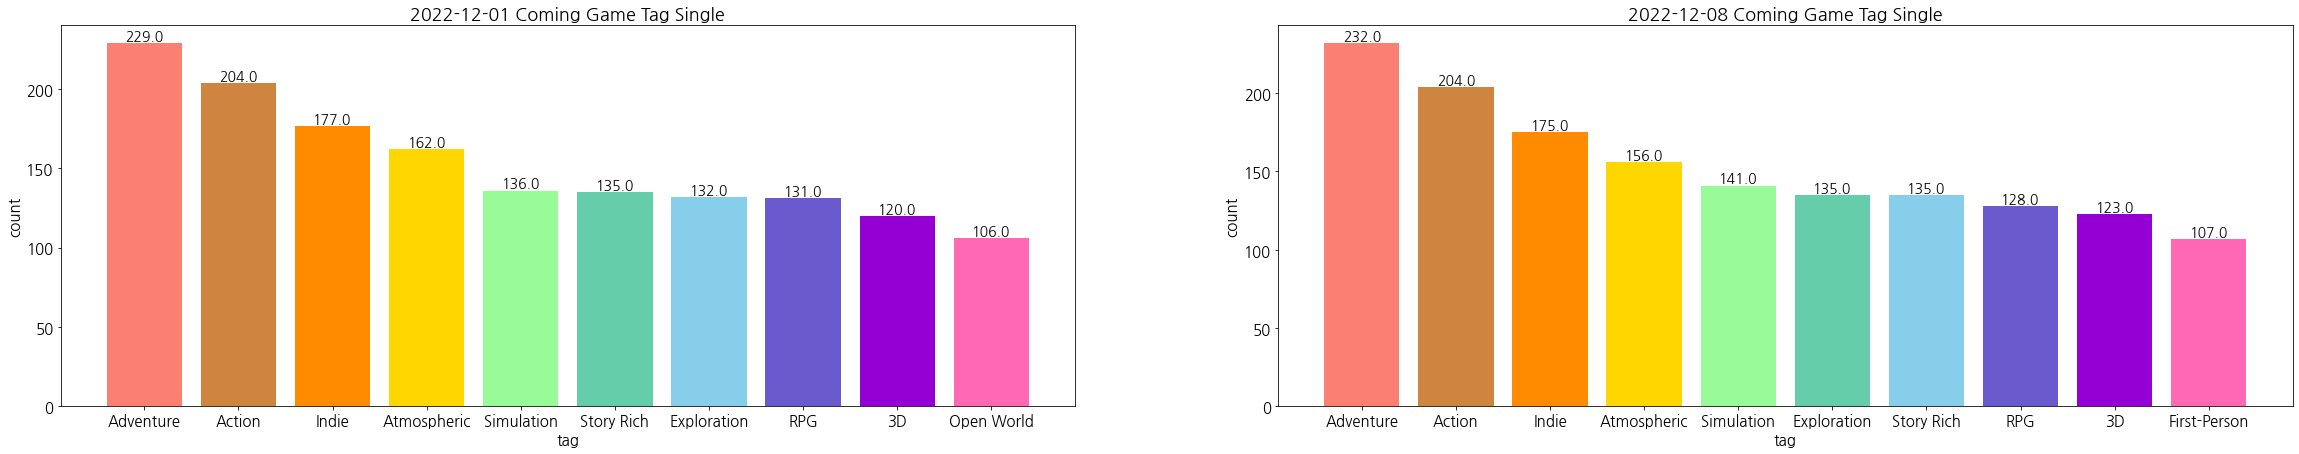

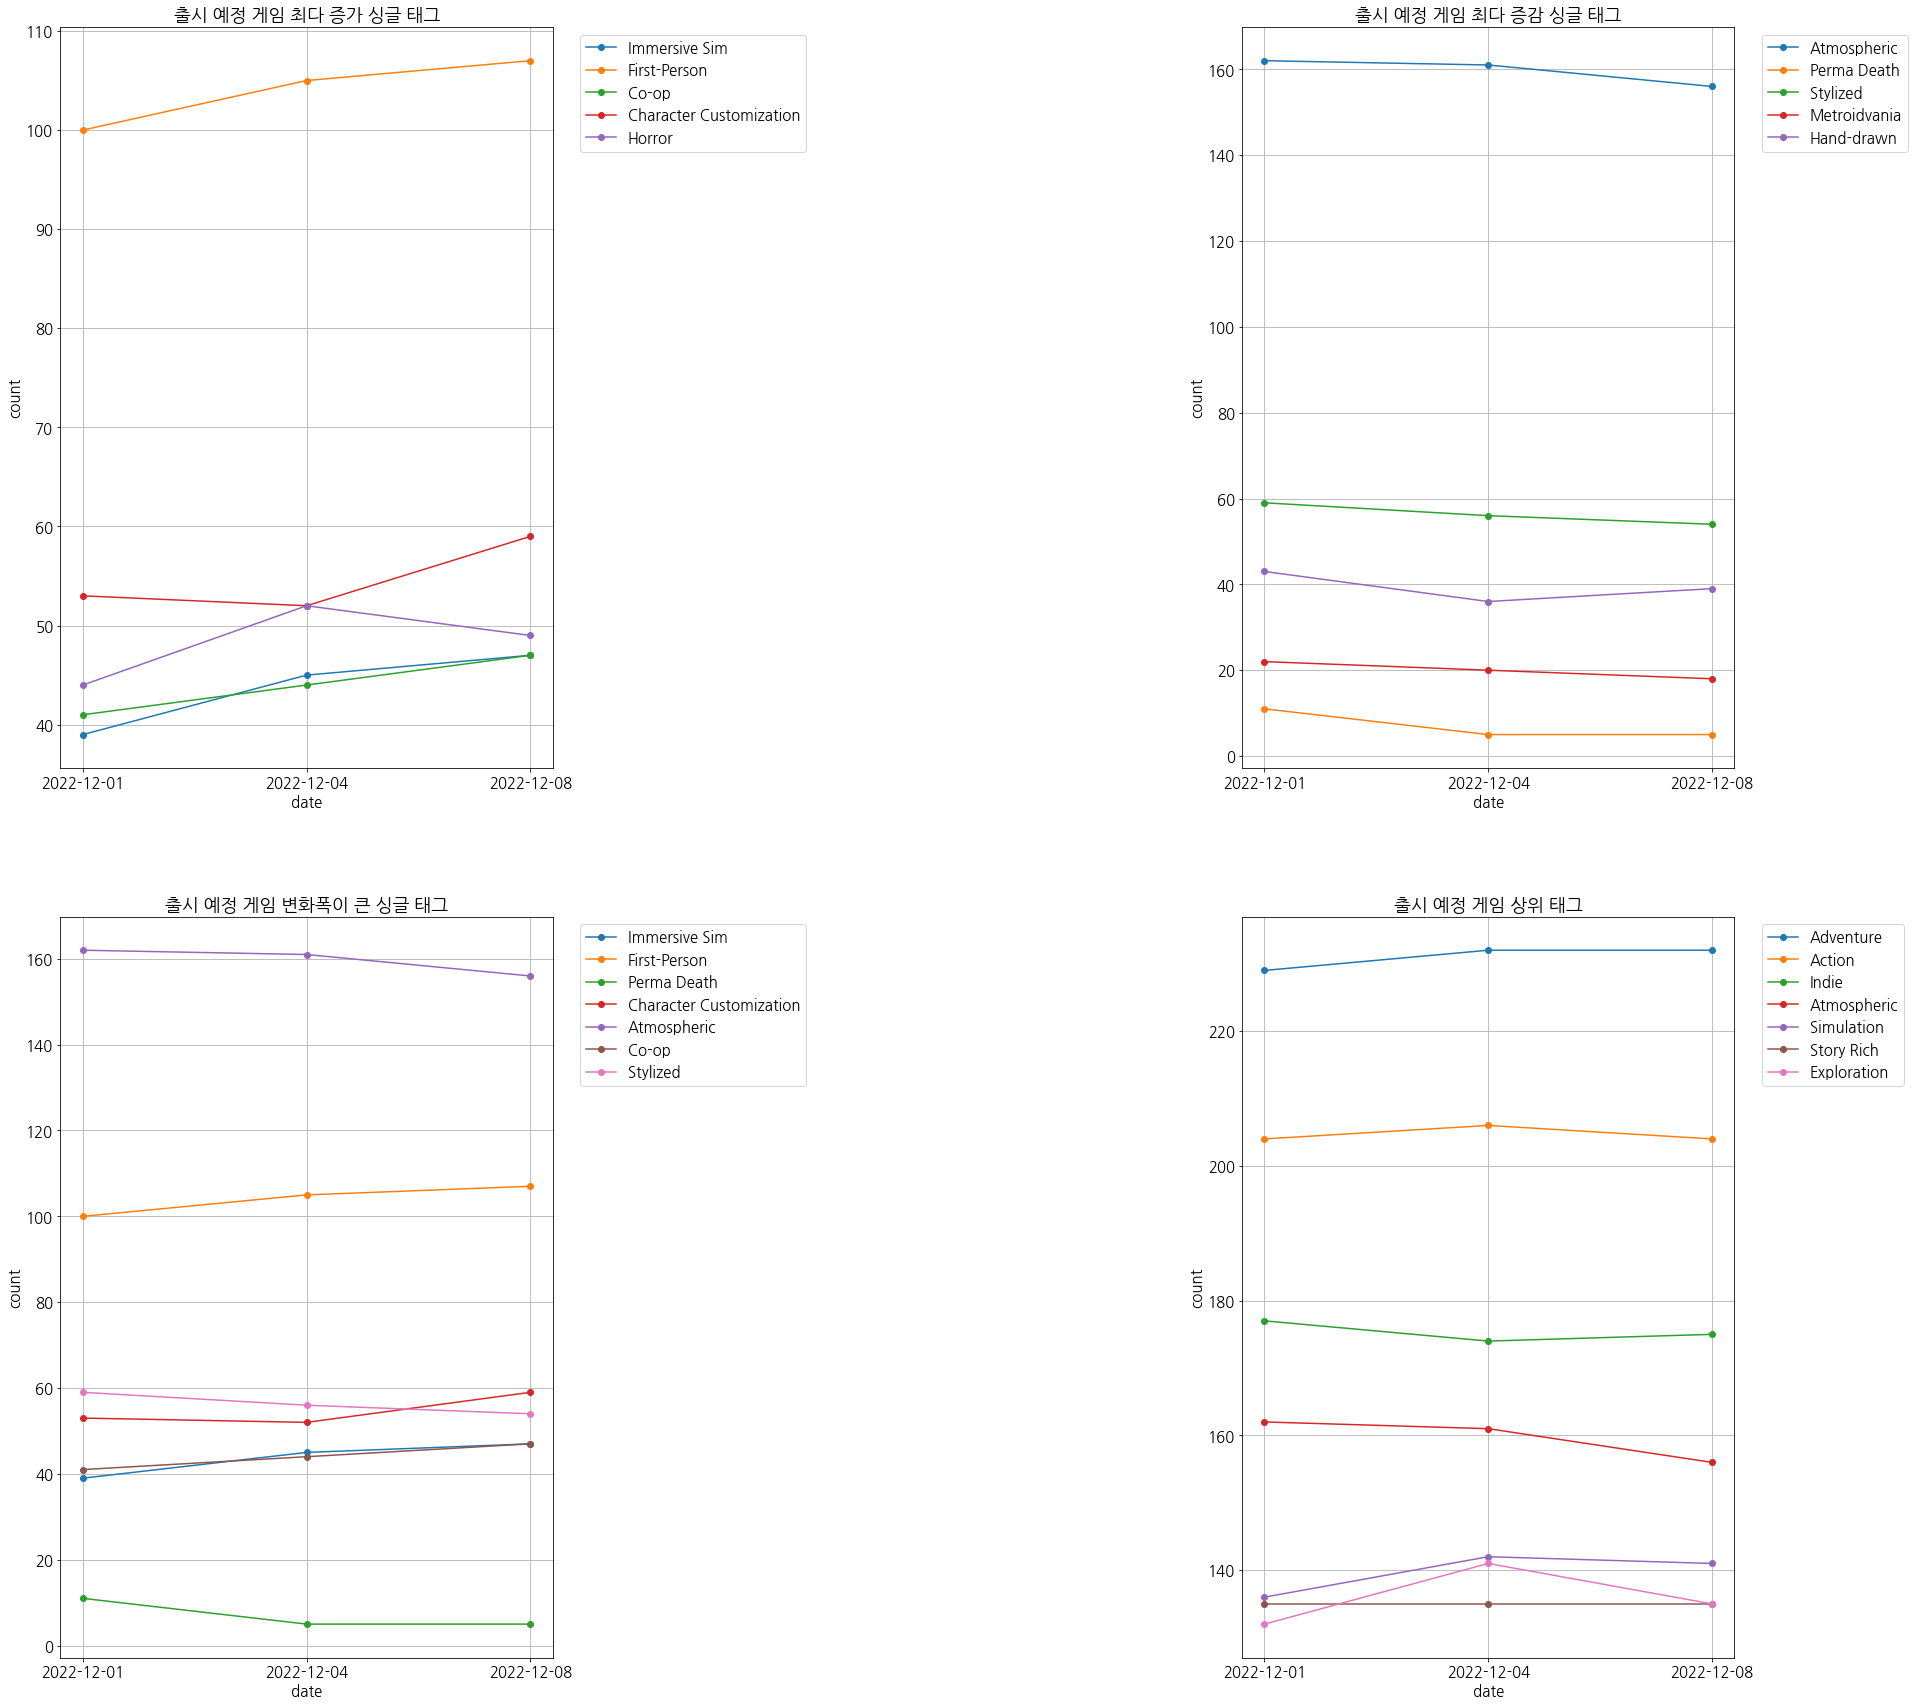

In [21]:
import matplotlib.pyplot as plt
plt.rc('font',size = 15)

deleteTag = ['Singleplayer','Multiplayer','Free to Play','Online Co-Op','Great Soundtrack'] #제거할 태그

coming_single_df = pd.read_csv('/content/coming_tag_single.csv')

for k in deleteTag:
  spec=coming_single_df[coming_single_df['tag']==k].index
  coming_single_df.drop(spec,inplace=True)

mask=(coming_single_df['date']=='2022-12-01') #일주일 전 싱글태그
former =  coming_single_df[mask]

mask = (coming_single_df['date']=='2022-12-04') #전주와 현재 사이의 넣을 데이터
middle = coming_single_df[mask]

mask=(coming_single_df['date']=='2022-12-08') # 현재 싱글 태그
now =  coming_single_df[mask]

former_top = former.tag.value_counts().head(10).rename_axis('tag').to_frame(name='2022-12-01') #개수가 많은 10개의 태그 가져오기
now_top = now.tag.value_counts().head(10).rename_axis('tag').to_frame(name='2022-12-08')

colors=['salmon','peru','darkorange','gold','palegreen','mediumaquamarine','skyblue','slateblue','darkviolet','hotpink']

fig=plt.figure(figsize=(40,7))

ax1=fig.add_subplot(1,2,1) #전주 태그 개수 그래프
ax1.set_title('2022-12-01 Coming Game Tag Single')
ax1.set(ylabel='count',xlabel='tag')

for rect in ax1.bar(former_top.index,former_top['2022-12-01'],color=colors): #bar 생성 및 개수 텍스트 표시
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 14)


ax2=fig.add_subplot(1,2,2)  #현재 태그 개수 그래프
ax2.set_title('2022-12-08 Coming Game Tag Single')
ax2.set(ylabel='count',xlabel='tag')

for rect in ax2.bar(now_top.index, now_top['2022-12-08'], color=colors): #bar 생성 및 개수 텍스트 표시
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 14)

fig.show()

#카운트 한것을 기반으로 새로운 DataFrame 생성
former = former.tag.value_counts().rename_axis('tag').to_frame(name='2022-12-01')
middle = middle.tag.value_counts().rename_axis('tag').to_frame(name='2022-12-04') #전주와 현재 사이의 넣을 데이터
now = now.tag.value_counts().rename_axis('tag').to_frame(name='2022-12-08')
#3개의 데이터 프레임을 합침
compare = pd.merge(former, middle, how='outer', on='tag')
compare = pd.merge(compare,now, how='outer', on='tag')

top_single=compare.sort_values(by='2022-12-08',ascending=[False]).head(7) #현재 태그개수 상위 7개
top_single = top_single.transpose() #그래프 표현을 위해 행 열 바꾸기
fig2=plt.figure(figsize=(30,30))

ax3=fig2.add_subplot(2,3,6)
ax3.set_title('출시 예정 게임 상위 태그')
ax3.plot(top_single.index,top_single.values, marker='o')
ax3.grid(True)
ax3.legend(bbox_to_anchor=(1.04, 1), labels=top_single.columns)
ax3.set(ylabel='count',xlabel='date')

compare = compare.fillna(0) #Nan값을 모두 0으로 변경
compare['compare']=compare['2022-12-08'] - compare['2022-12-01']#전주와 현재의 태그 수의 차이를 넣는 컬럼 추가
top_compare_single=compare.sort_values(by=['compare'],ascending=[False]).head(5) #가장 많은 수가 늘어난 태그 5가지
bottom_compare_single=compare.sort_values(by=['compare'],ascending=[True]).head(5) #가장 많이 줄어든 태그 5가지

top_compare_single = top_compare_single.drop(['compare'],axis=1).transpose() #그래프화를 위해 행열 바꾸기

ax4=fig2.add_subplot(2,3,1)
ax4.set_title('출시 예정 게임 최다 증가 싱글 태그')
ax4.plot(top_compare_single.index,top_compare_single.values, marker='o')
ax4.grid(True)
ax4.legend(bbox_to_anchor=(1.04, 1), labels=top_compare_single.columns)
ax4.set(ylabel='count',xlabel='date')

bottom_compare_single=bottom_compare_single.drop(['compare'],axis=1).transpose() #그래프화를 위해 행열 바꾸기
ax5=fig2.add_subplot(2,3,3)
ax5.set_title('출시 예정 게임 최다 증감 싱글 태그')
ax5.plot(bottom_compare_single.index,bottom_compare_single.values, marker='o')
ax5.grid(True)
ax5.legend(bbox_to_anchor=(1.04, 1), labels=bottom_compare_single.columns)
ax5.set(ylabel='count',xlabel='date')

def absolute(x): # 변화값의 절대값을 구하기 위한 함수
  if(x<0):
    return -x
  return x

compare['compare']=compare.apply(lambda x:absolute(x['compare']),axis=1) #개수 변화값을 절대값으로 변경

compare= compare.sort_values(by='compare',ascending=[False]).head(7) #태그 개수의 변화가 큰 태그 7개
compare = compare.drop(['compare'],axis=1).transpose() #그래프화를 위해 행열 바꾸기

ax6=fig2.add_subplot(2,3,4)
ax6.set_title('출시 예정 게임 변화폭이 큰 싱글 태그')
ax6.plot(compare.index,compare.values, marker='o')
ax6.grid(True)
ax6.legend(bbox_to_anchor=(1.04, 1), labels=compare.columns)
ax6.set(ylabel='count',xlabel='date')

fig2.show()



## 출시 예정 게임 더블 태그 분석

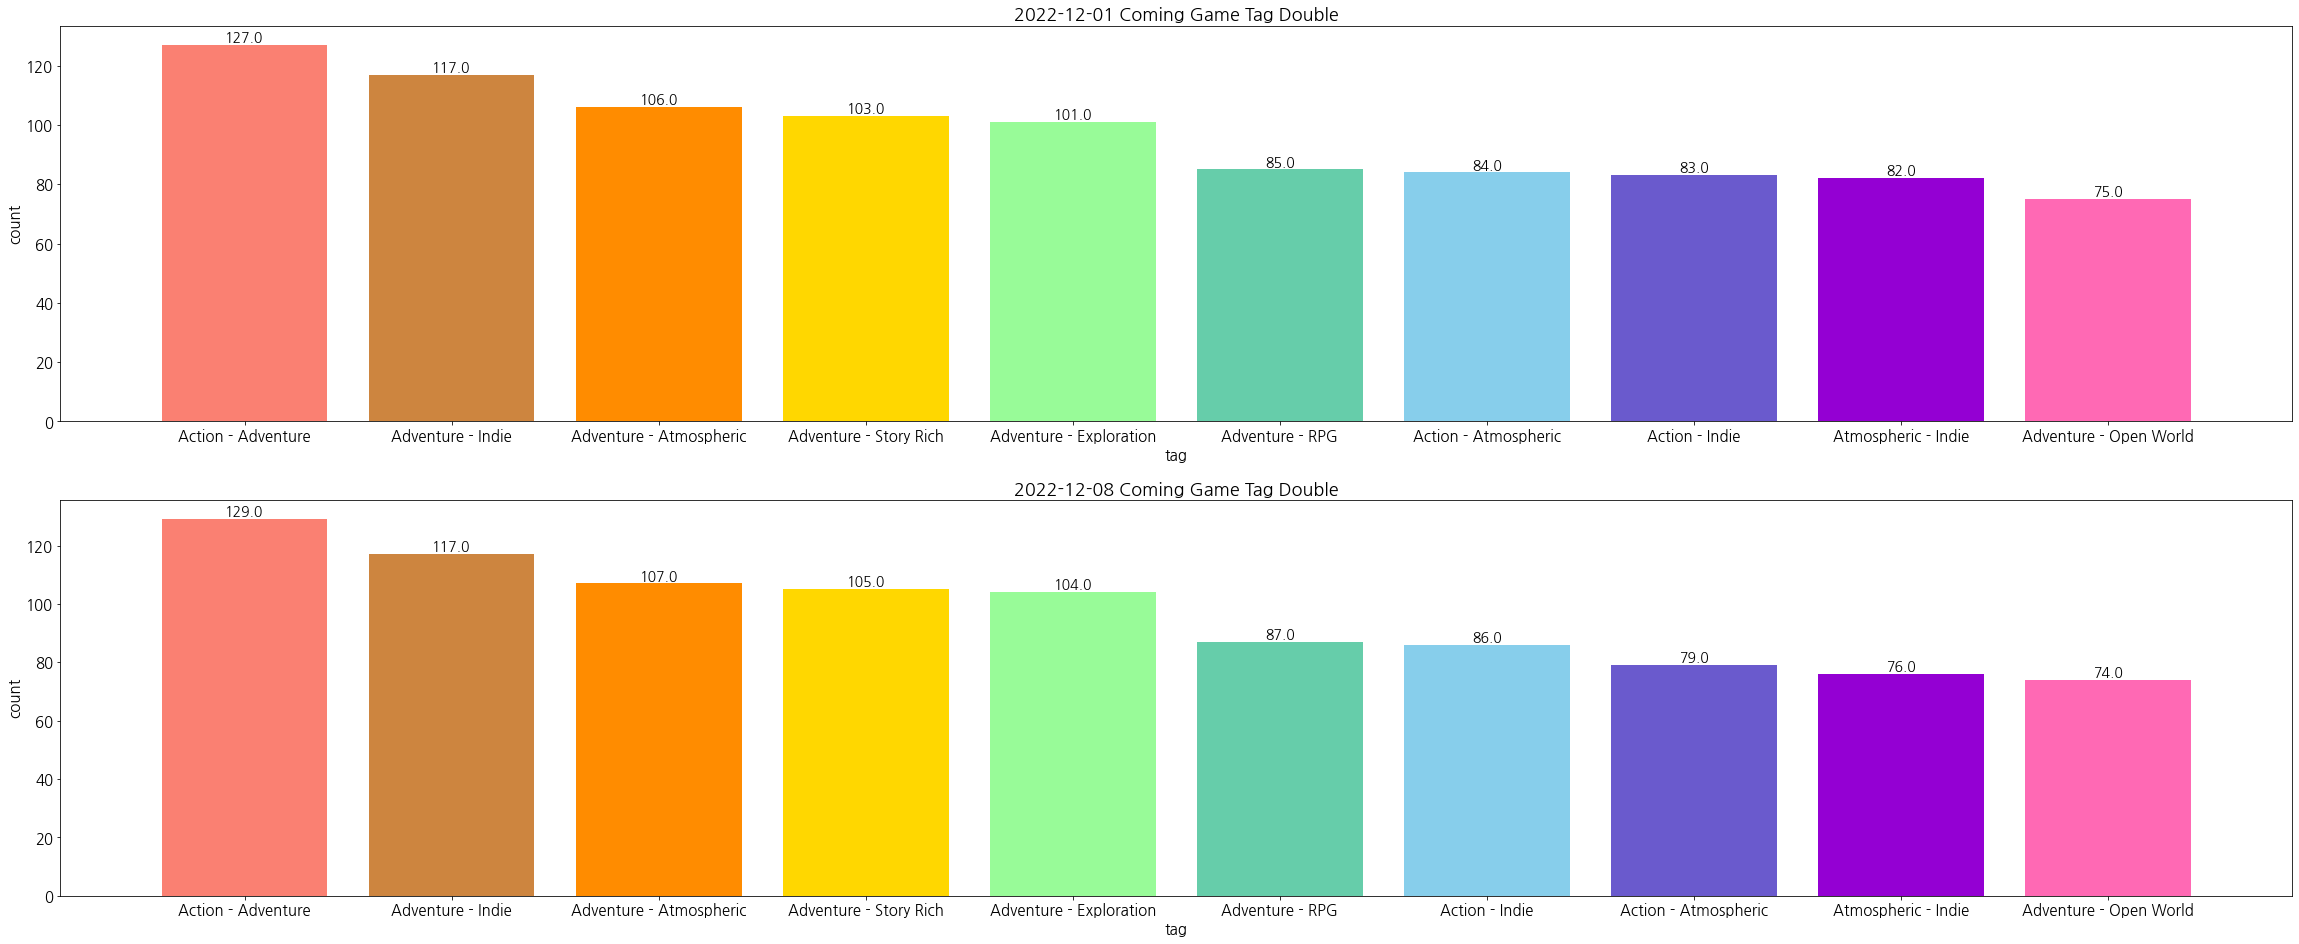

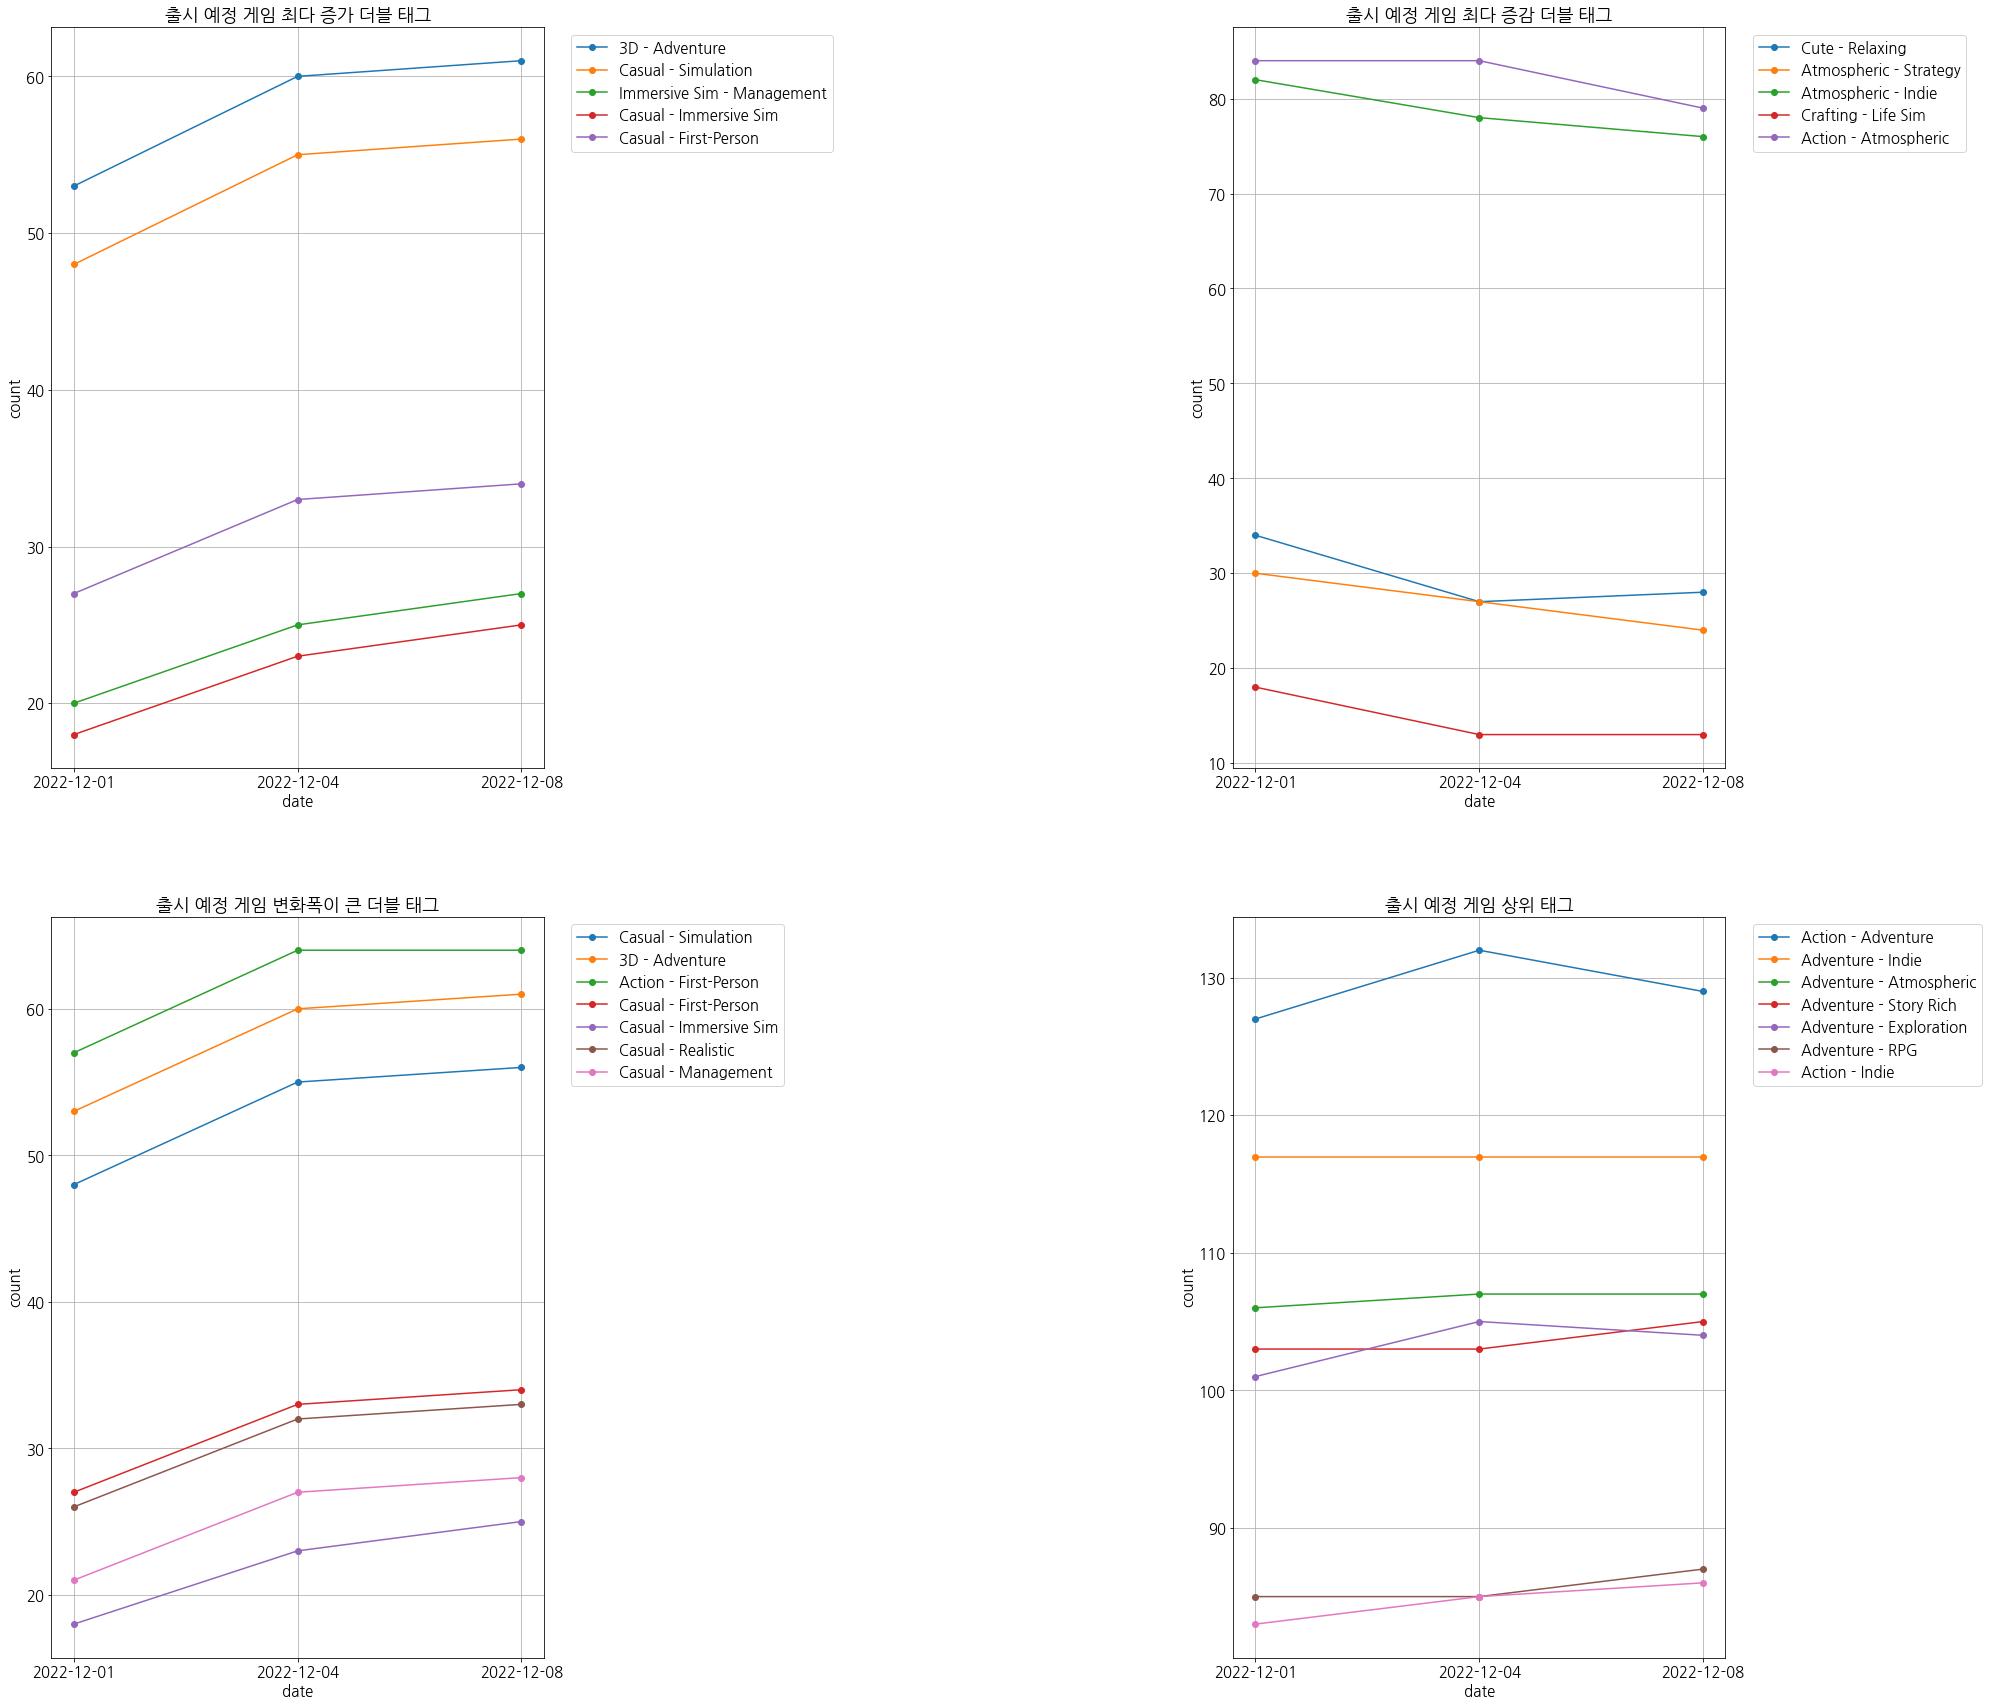

In [22]:
import matplotlib.pyplot as plt
plt.rc('font',size = 15)

deleteTag = ['Singleplayer','Multiplayer','Free to Play','Online Co-Op','Great Soundtrack'] #제거할 태그

coming_double_df = pd.read_csv('/content/coming_tag_double.csv')

for k in deleteTag:
  spec = coming_double_df[coming_double_df['tag'].str.contains(k)].index #deleteTag가 포함된 값 제거
  coming_double_df.drop(spec,inplace=True)

mask=(coming_double_df['date']=='2022-12-01')  #일주일 전 더블태그
former =  coming_double_df[mask]

mask = (coming_double_df['date']=='2022-12-04') # 중간 더블 태그
middle = coming_double_df[mask]

mask=(coming_double_df['date']=='2022-12-08') # 현재 더블 태그
now =  coming_double_df[mask]


former_top = former.tag.value_counts().head(10).rename_axis('tag').to_frame(name='2022-12-01') #개수가 많은 10개의 태그 가져오기
now_top = now.tag.value_counts().head(10).rename_axis('tag').to_frame(name='2022-12-08')

colors=['salmon','peru','darkorange','gold','palegreen','mediumaquamarine','skyblue','slateblue','darkviolet','hotpink']

fig=plt.figure(figsize=(40,16))

ax1=fig.add_subplot(2,1,1) #전주 태그 개수 그래프
ax1.set_title('2022-12-01 Coming Game Tag Double')
ax1.set(ylabel='count',xlabel='tag')

for rect in ax1.bar(former_top.index,former_top['2022-12-01'],color=colors): #bar 생성 및 개수 텍스트 표시
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 14)


ax2=fig.add_subplot(2,1,2)  #현재 태그 개수 그래프
ax2.set_title('2022-12-08 Coming Game Tag Double')
ax2.set(ylabel='count',xlabel='tag')

for rect in ax2.bar(now_top.index, now_top['2022-12-08'], color=colors): #bar 생성 및 개수 텍스트 표시
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 14)

fig.show()

#카운트 한것을 기반으로 새로운 DataFrame 생성
former = former.tag.value_counts().rename_axis('tag').to_frame(name='2022-12-01')
middle = middle.tag.value_counts().rename_axis('tag').to_frame(name='2022-12-04') #전주와 현재 사이의 넣을 데이터
now = now.tag.value_counts().rename_axis('tag').to_frame(name='2022-12-08')
#3개의 데이터 프레임을 합침
compare = pd.merge(former, middle, how='outer', on='tag')
compare = pd.merge(compare,now, how='outer', on='tag')

top_double=compare.sort_values(by='2022-12-08',ascending=[False]).head(7) #현재 태그개수 상위 7개
top_double = top_double.transpose() #그래프 표현을 위해 행 열 바꾸기

fig2=plt.figure(figsize=(30,30))

ax3=fig2.add_subplot(2,3,6)
ax3.set_title('출시 예정 게임 상위 태그')
ax3.plot(top_double.index,top_double.values, marker='o')
ax3.grid(True)
ax3.legend(bbox_to_anchor=(1.04, 1), labels=top_double.columns)
ax3.set(ylabel='count',xlabel='date')

compare = compare.fillna(0) #Nan값을 모두 0으로 변경
compare['compare']=compare['2022-12-08'] - compare['2022-12-01'] #전주와 현재의 태그 수의 차이를 넣는 컬럼 추가

top_compare_double=compare.sort_values(by=['compare'],ascending=[False]).head(5) #가장 많은 수가 늘어난 태그 5가지
bottom_compare_double=compare.sort_values(by=['compare'],ascending=[True]).head(5) #가장 많이 줄어든 태그 5가지

top_compare_double = top_compare_double.drop(['compare'],axis=1).transpose() #그래프화를 위해 행열 바꾸기
ax4=fig2.add_subplot(2,3,1)
ax4.set_title('출시 예정 게임 최다 증가 더블 태그')
ax4.plot(top_compare_double.index,top_compare_double.values, marker='o')
ax4.grid(True)
ax4.legend(bbox_to_anchor=(1.04, 1), labels=top_compare_double.columns)
ax4.set(ylabel='count',xlabel='date')

bottom_compare_double=bottom_compare_double.drop(['compare'],axis=1).transpose() #그래프화를 위해 행열 바꾸기
ax5=fig2.add_subplot(2,3,3)
ax5.set_title('출시 예정 게임 최다 증감 더블 태그')
ax5.plot(bottom_compare_double.index,bottom_compare_double.values, marker='o')
ax5.grid(True)
ax5.legend(bbox_to_anchor=(1.04, 1), labels=bottom_compare_double.columns)
ax5.set(ylabel='count',xlabel='date')

def absolute(x): # 변화값의 절대값을 구하기 위한 함수
  if(x<0):
    return -x
  return x

compare['compare']=compare.apply(lambda x:absolute(x['compare']),axis=1) #개수 변화값을 절대값으로 변경

compare= compare.sort_values(by='compare',ascending=[False]).head(7) #태그 개수의 변화가 큰 태그 7개
compare = compare.drop(['compare'],axis=1).transpose() #그래프화를 위해 행열 바꾸기

ax6=fig2.add_subplot(2,3,4)
ax6.set_title('출시 예정 게임 변화폭이 큰 더블 태그')
ax6.plot(compare.index,compare.values, marker='o')
ax6.grid(True)
ax6.legend(bbox_to_anchor=(1.04, 1), labels=compare.columns)
ax6.set(ylabel='count',xlabel='date')

fig2.show()




## 최다 판매 게임 싱글 태그 분석

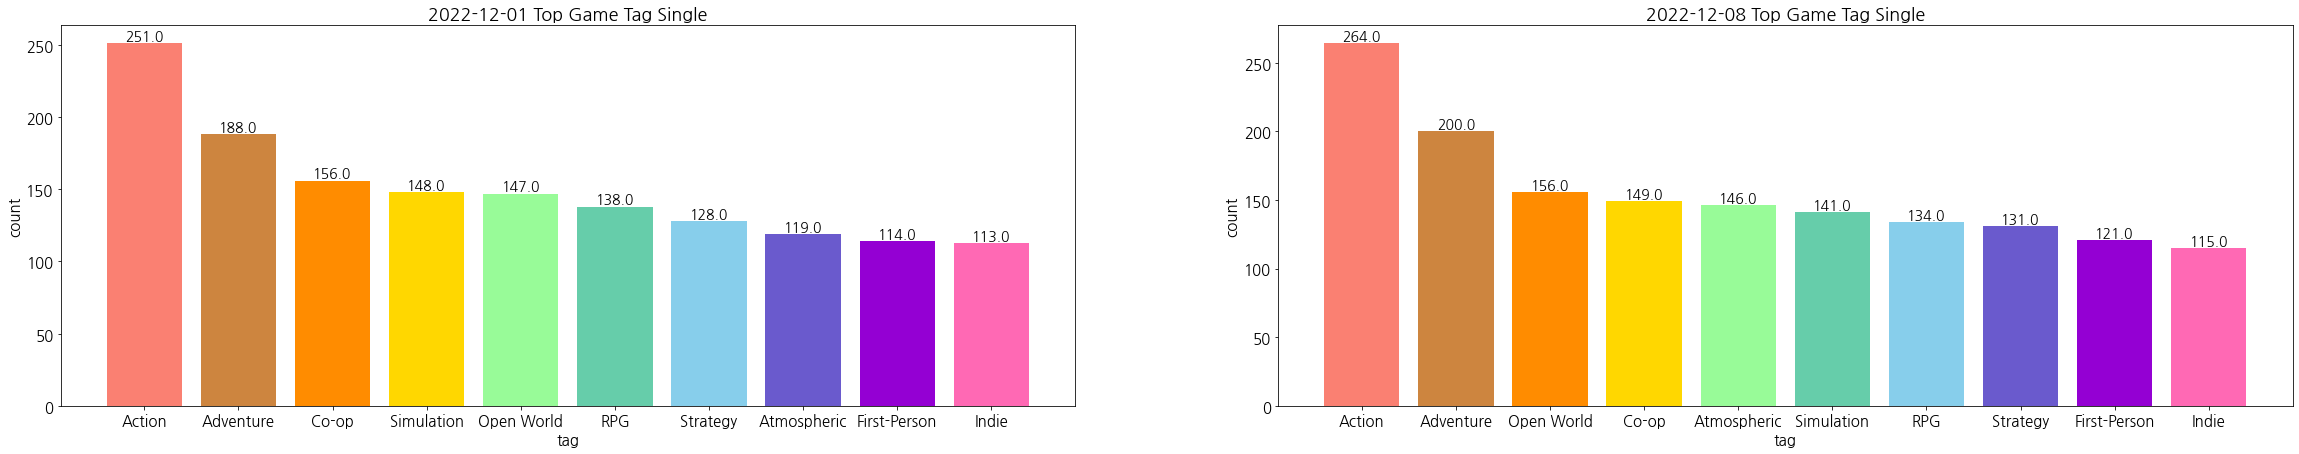

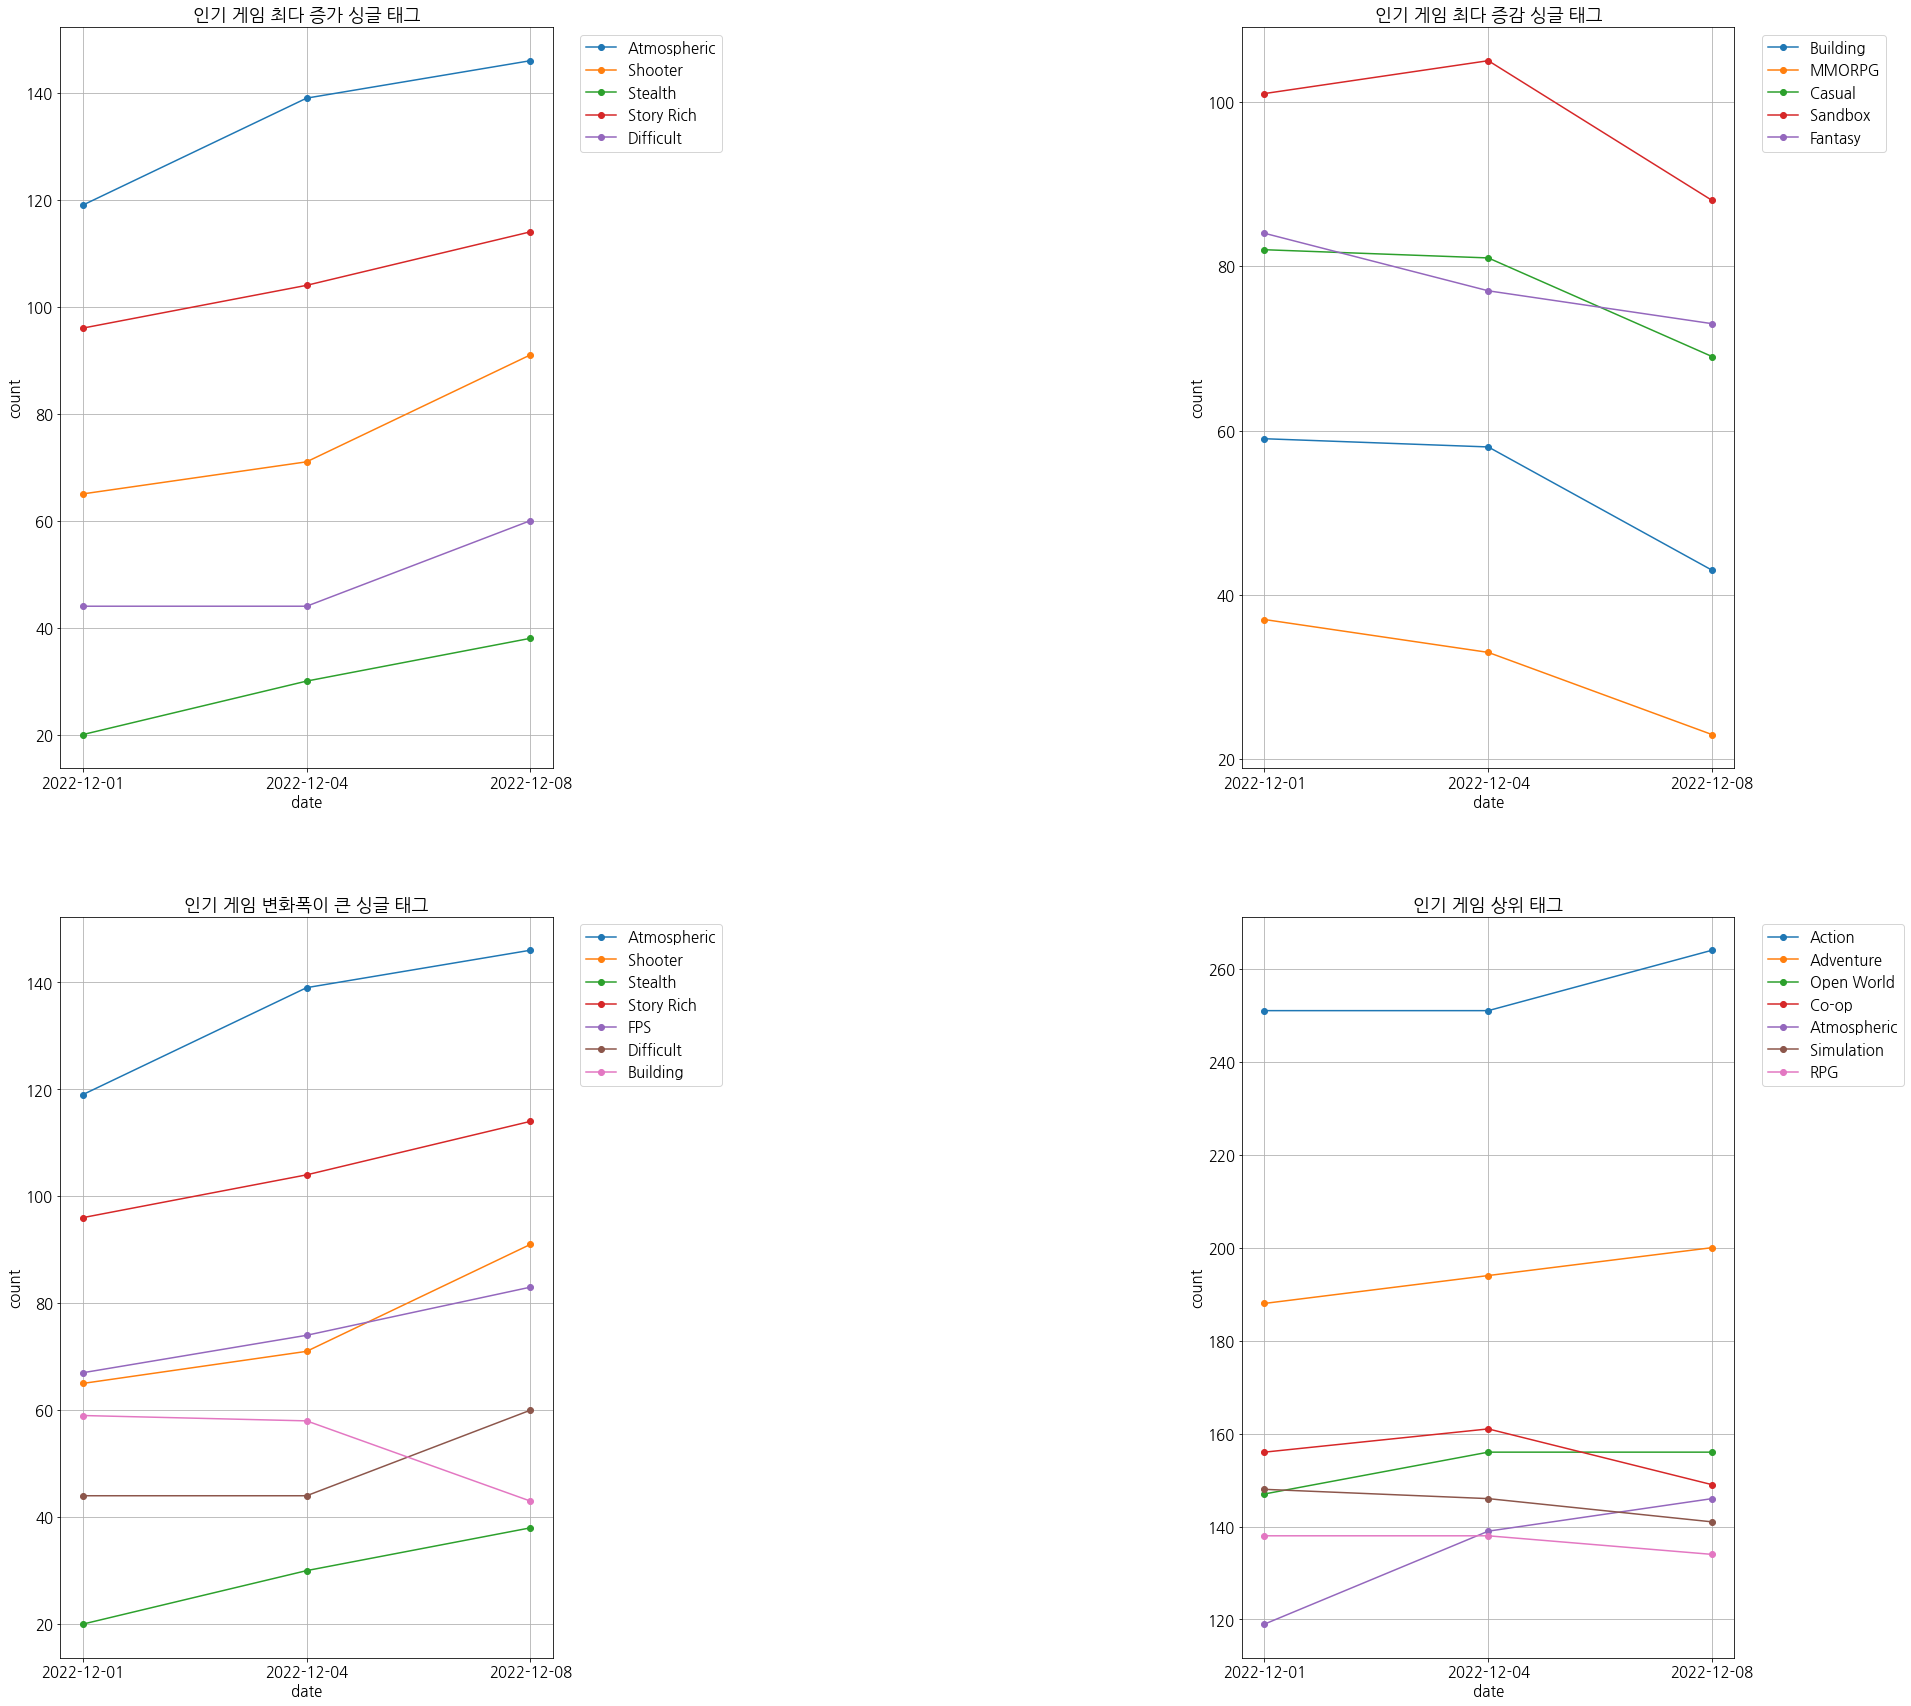

In [23]:
import matplotlib.pyplot as plt

plt.rc('font',size = 15)

deleteTag = ['Singleplayer','Multiplayer','Free to Play','Online Co-Op','Great Soundtrack'] #제거할 태그

top_single_df = pd.read_csv('/content/top_tag_single.csv')

for k in deleteTag:
  spec=top_single_df[top_single_df['tag']==k].index
  top_single_df.drop(spec,inplace=True)

mask=(top_single_df['date']=='2022-12-01') #일주일 전 싱글태그
former =  top_single_df[mask]

mask = (top_single_df['date']=='2022-12-04') #전주와 현재 사이의 넣을 데이터
middle = top_single_df[mask]

mask=(top_single_df['date']=='2022-12-08') # 현재 싱글 태그
now =  top_single_df[mask]

former_top = former.tag.value_counts().head(10).rename_axis('tag').to_frame(name='2022-12-01') #개수가 많은 10개의 태그 가져오기
now_top = now.tag.value_counts().head(10).rename_axis('tag').to_frame(name='2022-12-08')

colors=['salmon','peru','darkorange','gold','palegreen','mediumaquamarine','skyblue','slateblue','darkviolet','hotpink']

fig=plt.figure(figsize=(40,7))

ax1=fig.add_subplot(1,2,1) #전주 태그 개수 그래프
ax1.set_title('2022-12-01 Top Game Tag Single')
ax1.set(ylabel='count',xlabel='tag')

for rect in ax1.bar(former_top.index,former_top['2022-12-01'],color=colors): #bar 생성 및 개수 텍스트 표시
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 14)


ax2=fig.add_subplot(1,2,2)  #현재 태그 개수 그래프
ax2.set_title('2022-12-08 Top Game Tag Single')
ax2.set(ylabel='count',xlabel='tag')

for rect in ax2.bar(now_top.index, now_top['2022-12-08'], color=colors): #bar 생성 및 개수 텍스트 표시
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 14)

fig.show()

#카운트 한것을 기반으로 새로운 DataFrame 생성
former = former.tag.value_counts().rename_axis('tag').to_frame(name='2022-12-01')
middle = middle.tag.value_counts().rename_axis('tag').to_frame(name='2022-12-04') #전주와 현재 사이의 넣을 데이터
now = now.tag.value_counts().rename_axis('tag').to_frame(name='2022-12-08')
#3개의 데이터 프레임을 합침
compare = pd.merge(former, middle, how='outer', on='tag')
compare = pd.merge(compare,now, how='outer', on='tag')

top_single=compare.sort_values(by='2022-12-08',ascending=[False]).head(7) #현재 태그개수 상위 7개
top_single = top_single.transpose() #그래프 표현을 위해 행 열 바꾸기
fig2=plt.figure(figsize=(30,30))

ax3=fig2.add_subplot(2,3,6)
ax3.set_title('인기 게임 상위 태그')
ax3.plot(top_single.index,top_single.values, marker='o')
ax3.grid(True)
ax3.legend(bbox_to_anchor=(1.04, 1), labels=top_single.columns)
ax3.set(ylabel='count',xlabel='date')

compare = compare.fillna(0) #Nan값을 모두 0으로 변경
compare['compare']=compare['2022-12-08'] - compare['2022-12-01']#전주와 현재의 태그 수의 차이를 넣는 컬럼 추가

top_compare_single=compare.sort_values(by=['compare'],ascending=[False]).head(5) #가장 많은 수가 늘어난 태그 5가지
bottom_compare_single=compare.sort_values(by=['compare'],ascending=[True]).head(5) #가장 많이 줄어든 태그 5가지

top_compare_single = top_compare_single.drop(['compare'],axis=1).transpose() #그래프화를 위해 행열 바꾸기


ax4=fig2.add_subplot(2,3,1)
ax4.set_title('인기 게임 최다 증가 싱글 태그')
ax4.plot(top_compare_single.index,top_compare_single.values, marker='o')
ax4.grid(True)
ax4.legend(bbox_to_anchor=(1.04, 1), labels=top_compare_single.columns)
ax4.set(ylabel='count',xlabel='date')

bottom_compare_single=bottom_compare_single.drop(['compare'],axis=1).transpose() #그래프화를 위해 행열 바꾸기
ax5=fig2.add_subplot(2,3,3)
ax5.set_title('인기 게임 최다 증감 싱글 태그')
ax5.plot(bottom_compare_single.index,bottom_compare_single.values, marker='o')
ax5.grid(True)
ax5.legend(bbox_to_anchor=(1.04, 1), labels=bottom_compare_single.columns)
ax5.set(ylabel='count',xlabel='date')


compare = compare.fillna(0) #Nan값을 모두 0으로 변경
compare['compare']=compare['2022-12-08'] - compare['2022-12-01'] #전주와 현재의 태그 수의 차이를 넣는 컬럼 추가
top_compare_single=compare.sort_values(by=['compare'],ascending=[False]).head(5) #가장 많은 수가 늘어난 태그 5가지
bottom_compare_single=compare.sort_values(by=['compare'],ascending=[True]).head(5) #가장 많이 줄어든 태그 5가지

def absolute(x): # 변화값의 절대값을 구하기 위한 함수
  if(x<0):
    return -x
  return x

compare['compare']=compare.apply(lambda x:absolute(x['compare']),axis=1) #개수 변화값을 절대값으로 변경
compare= compare.sort_values(by='compare',ascending=[False]).head(7) #태그 개수의 변화가 큰 태그 7개
compare = compare.drop(['compare'],axis=1).transpose() #그래프화를 위해 행열 바꾸기

ax6=fig2.add_subplot(2,3,4)
ax6.set_title('인기 게임 변화폭이 큰 싱글 태그')
ax6.plot(compare.index,compare.values, marker='o')
ax6.grid(True)
ax6.legend(bbox_to_anchor=(1.04, 1), labels=compare.columns)
ax6.set(ylabel='count',xlabel='date')

fig2.show()



## 최다 판매 게임 더블 태그 분석

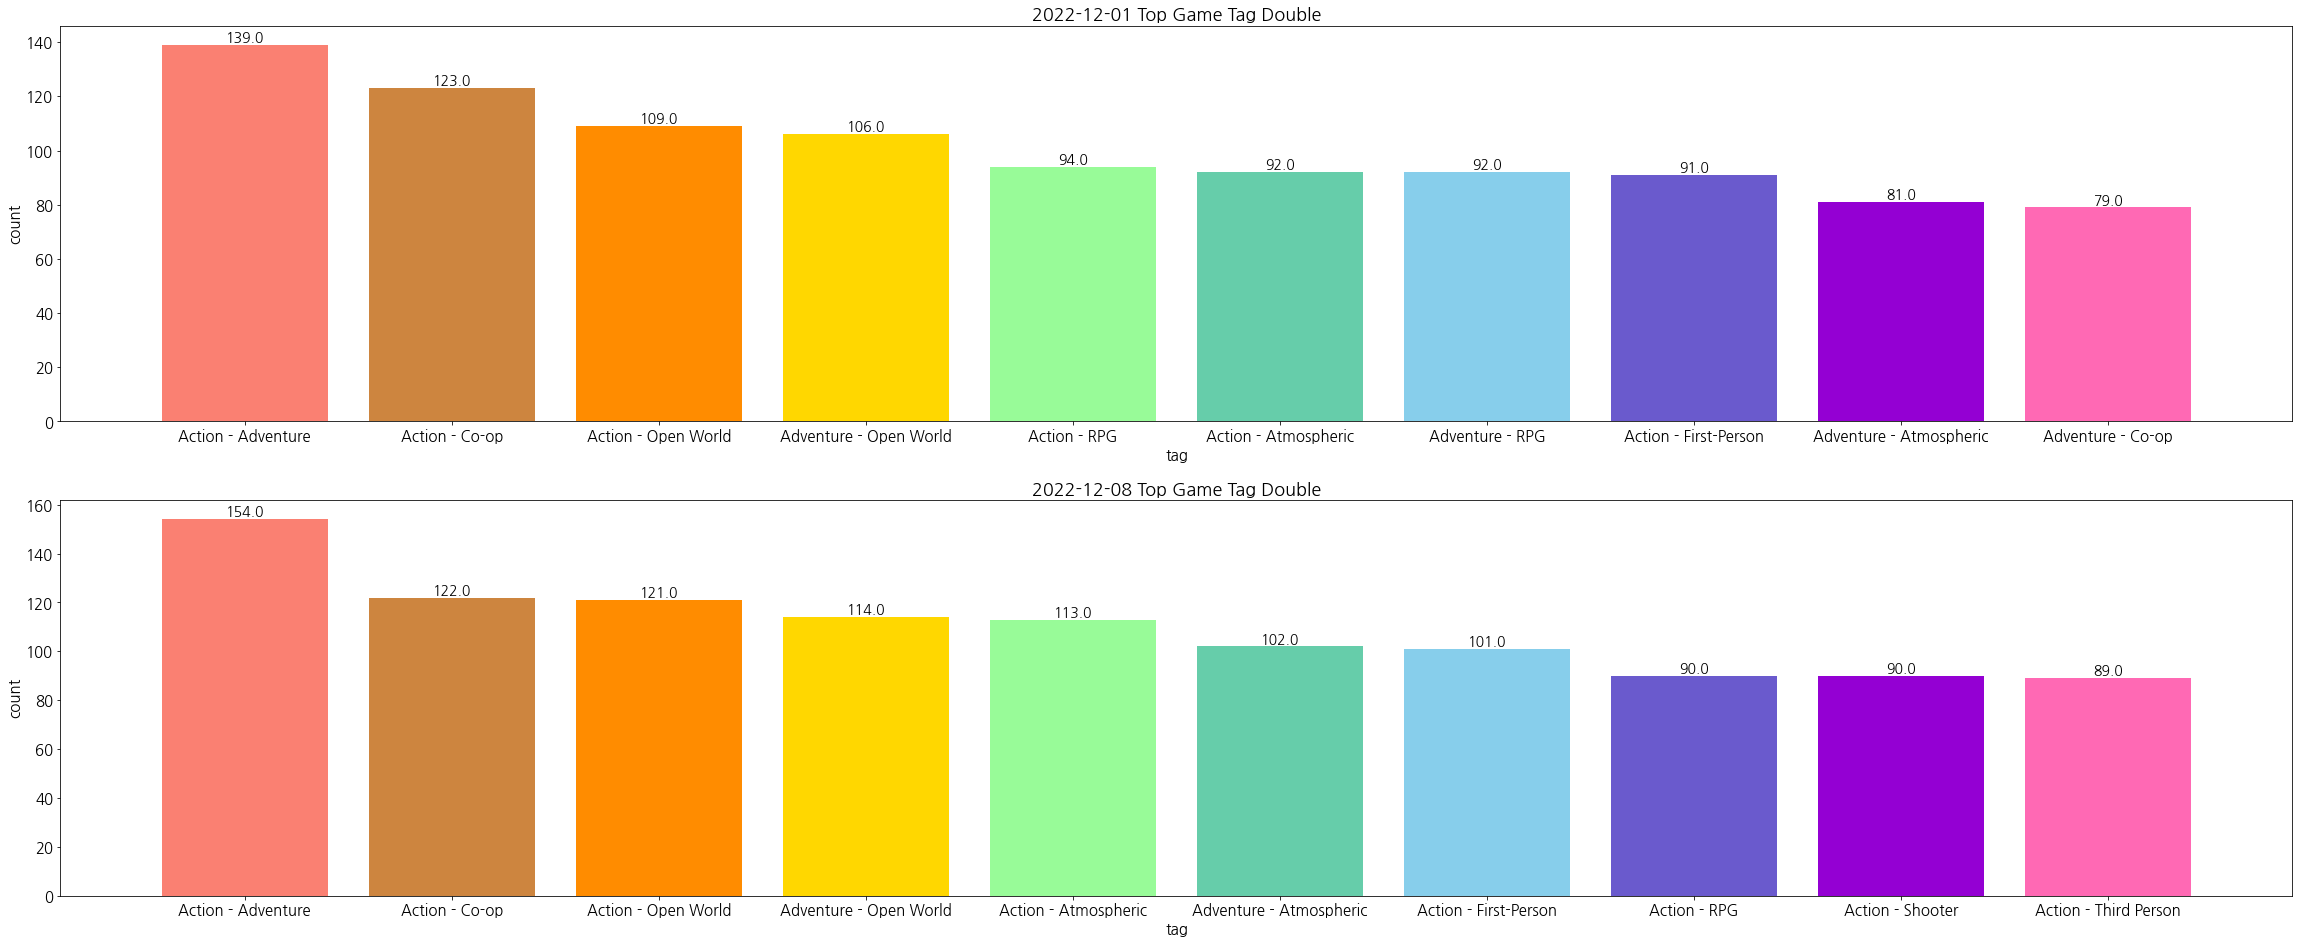

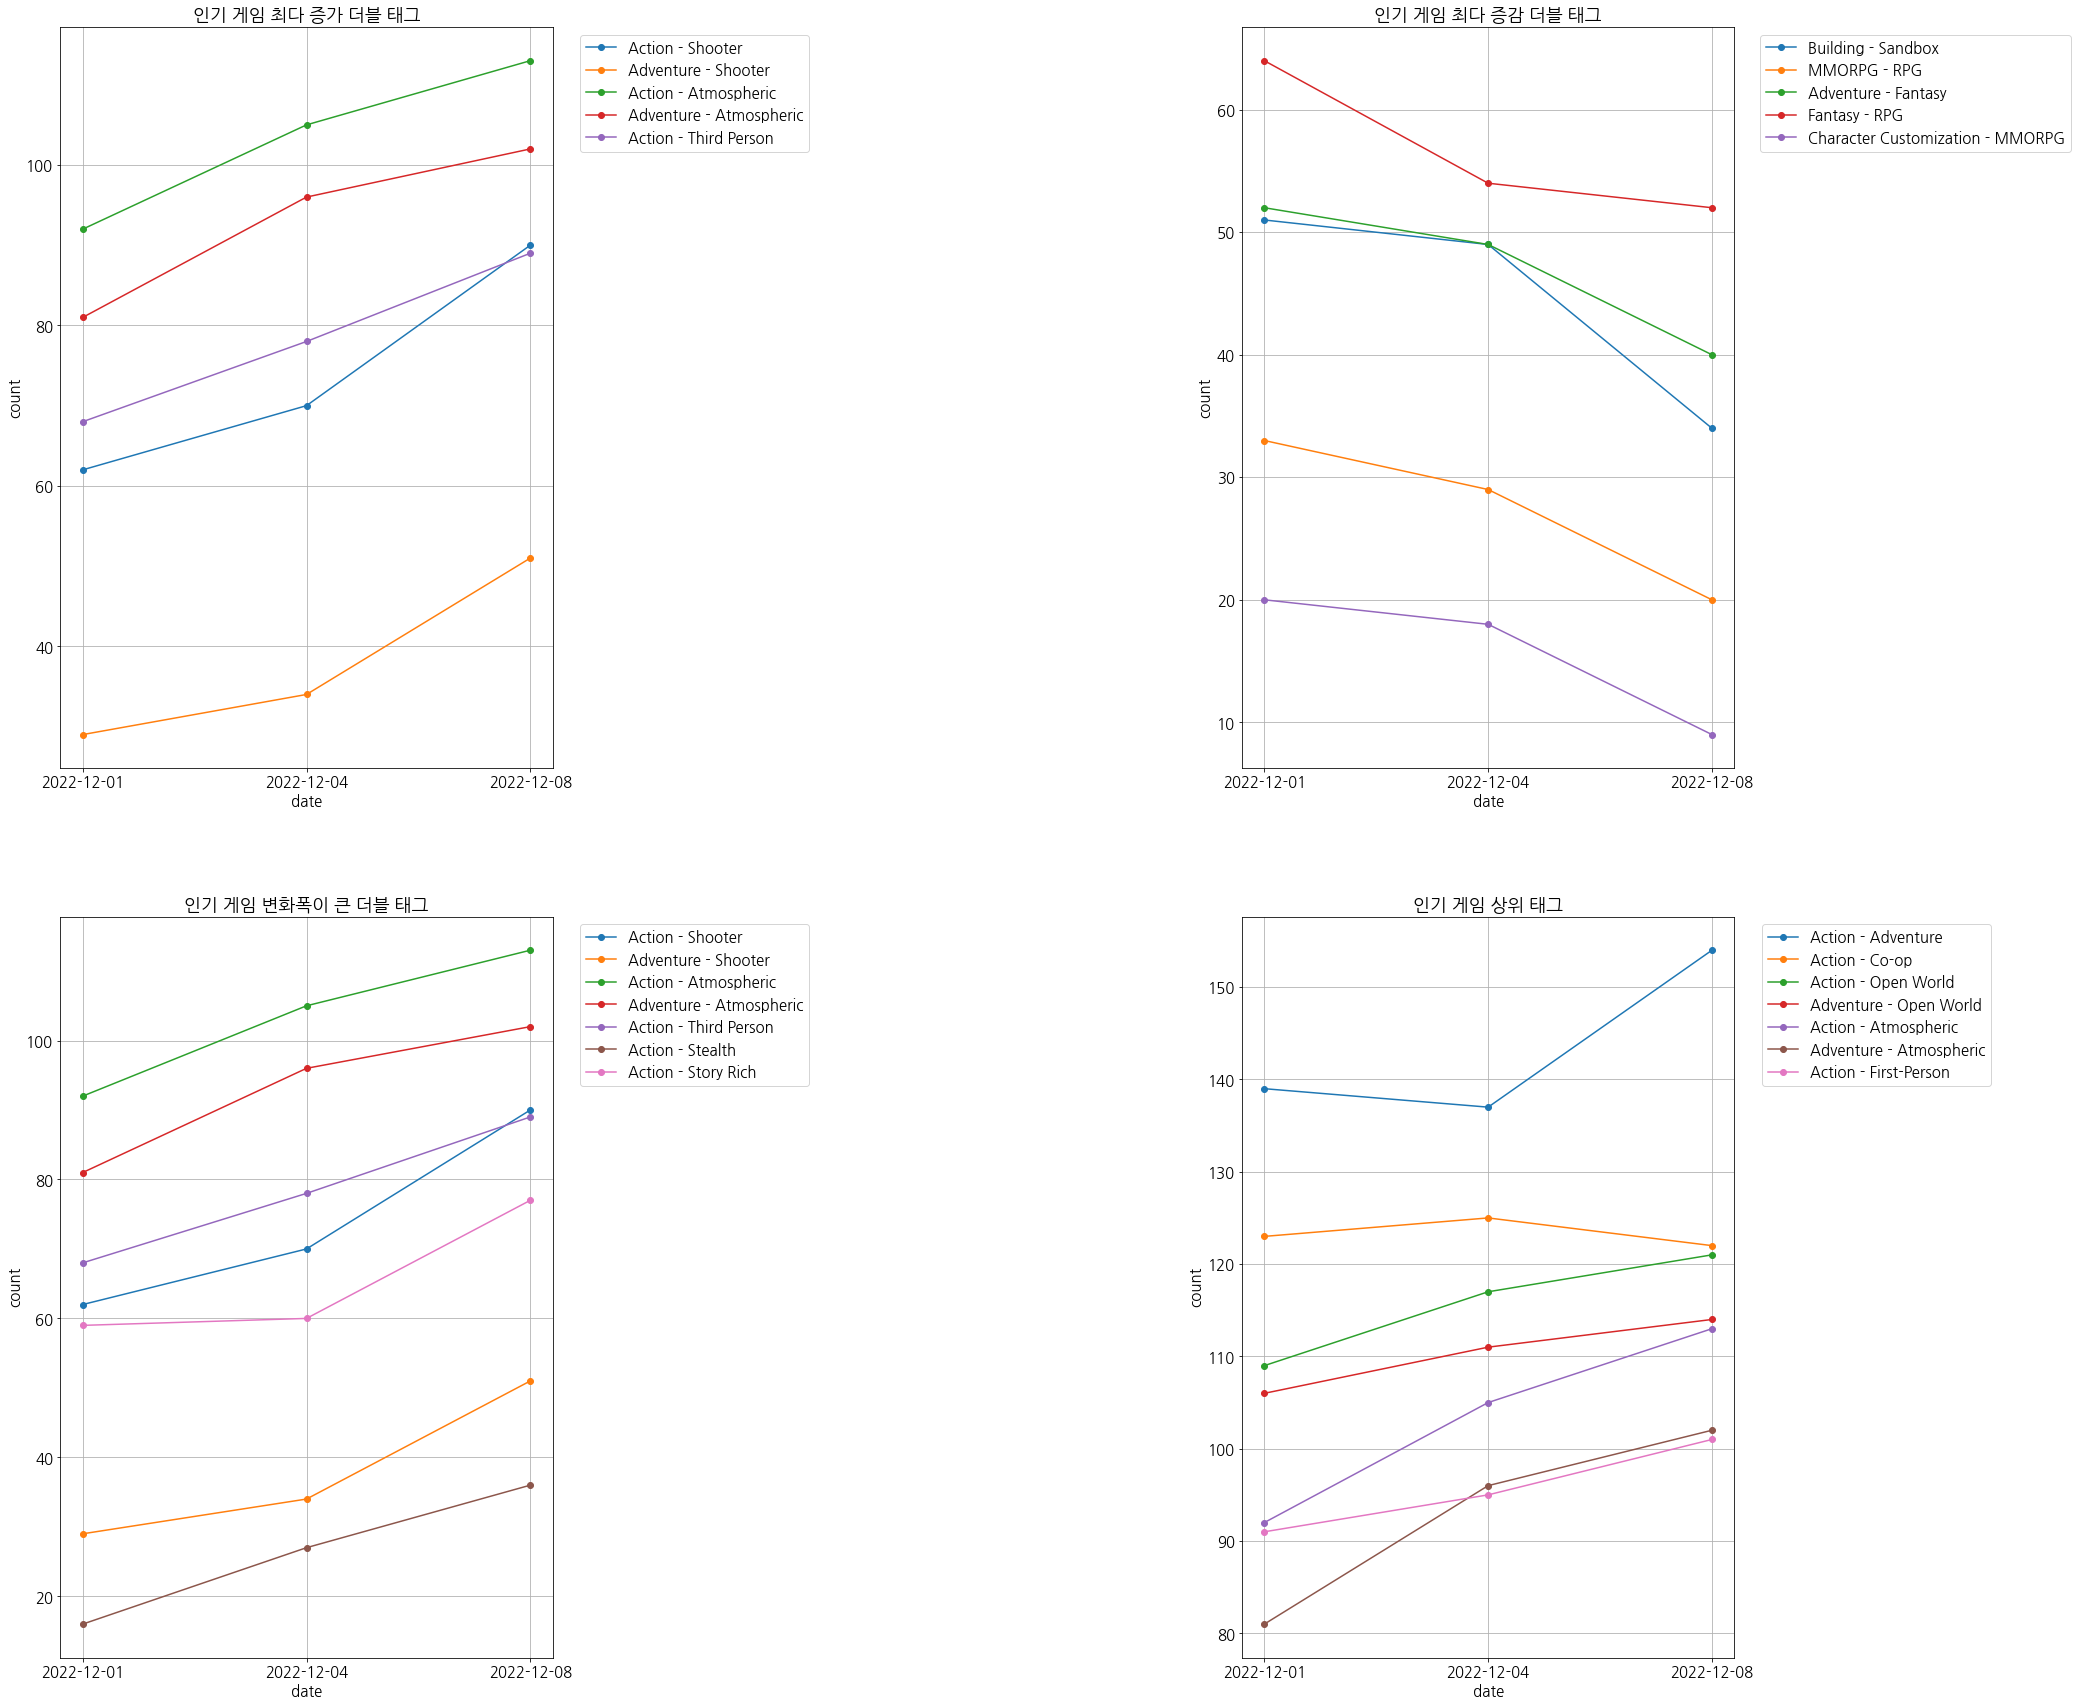

In [24]:
import matplotlib.pyplot as plt
plt.rc('font',size = 15)

deleteTag = ['Singleplayer','Multiplayer','Free to Play','Online Co-Op','Great Soundtrack'] #제거할 태그

top_double_df = pd.read_csv('/content/top_tag_double.csv')

for k in deleteTag:
  spec = top_double_df[top_double_df['tag'].str.contains(k)].index #deleteTag가 포함된 값 제거
  top_double_df.drop(spec,inplace=True)

mask=(top_double_df['date']=='2022-12-01')  #일주일 전 더블태그
former =  top_double_df[mask]

mask = (top_double_df['date']=='2022-12-04') # 중간 더블 태그
middle = top_double_df[mask]

mask=(top_double_df['date']=='2022-12-08') # 현재 더블 태그
now =  top_double_df[mask]


former_top = former.tag.value_counts().head(10).rename_axis('tag').to_frame(name='2022-12-01') #개수가 많은 10개의 태그 가져오기
now_top = now.tag.value_counts().head(10).rename_axis('tag').to_frame(name='2022-12-08')

colors=['salmon','peru','darkorange','gold','palegreen','mediumaquamarine','skyblue','slateblue','darkviolet','hotpink']

fig=plt.figure(figsize=(40,16))

ax1=fig.add_subplot(2,1,1) #전주 태그 개수 그래프
ax1.set_title('2022-12-01 Top Game Tag Double')
ax1.set(ylabel='count',xlabel='tag')

for rect in ax1.bar(former_top.index,former_top['2022-12-01'],color=colors): #bar 생성 및 개수 텍스트 표시
    height = rect.get_height()
    ax1.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 14)


ax2=fig.add_subplot(2,1,2)  #현재 태그 개수 그래프
ax2.set_title('2022-12-08 Top Game Tag Double')
ax2.set(ylabel='count',xlabel='tag')

for rect in ax2.bar(now_top.index, now_top['2022-12-08'], color=colors): #bar 생성 및 개수 텍스트 표시
    height = rect.get_height()
    ax2.text(rect.get_x() + rect.get_width()/2.0, height, '%.1f' % height, ha='center', va='bottom', size = 14)

fig.show()


#카운트 한것을 기반으로 새로운 DataFrame 생성
former = former.tag.value_counts().rename_axis('tag').to_frame(name='2022-12-01')
middle = middle.tag.value_counts().rename_axis('tag').to_frame(name='2022-12-04') #전주와 현재 사이의 넣을 데이터
now = now.tag.value_counts().rename_axis('tag').to_frame(name='2022-12-08')
#3개의 데이터 프레임을 합침
compare = pd.merge(former, middle, how='outer', on='tag')
compare = pd.merge(compare,now, how='outer', on='tag')

top_double=compare.sort_values(by='2022-12-08',ascending=[False]).head(7) #현재 태그개수 상위 7개
top_double = top_double.transpose() #그래프 표현을 위해 행 열 바꾸기

fig2=plt.figure(figsize=(30,30))

ax3=fig2.add_subplot(2,3,6)
ax3.set_title('인기 게임 상위 태그')
ax3.plot(top_double.index,top_double.values, marker='o')
ax3.grid(True)
ax3.legend(bbox_to_anchor=(1.04, 1), labels=top_double.columns)
ax3.set(ylabel='count',xlabel='date')

compare = compare.fillna(0) #Nan값을 모두 0으로 변경
compare['compare']=compare['2022-12-08'] - compare['2022-12-01'] #전주와 현재의 태그 수의 차이를 넣는 컬럼 추가

top_compare_double=compare.sort_values(by=['compare'],ascending=[False]).head(5) #가장 많은 수가 늘어난 태그 5가지
bottom_compare_double=compare.sort_values(by=['compare'],ascending=[True]).head(5) #가장 많이 줄어든 태그 5가지


top_compare_double = top_compare_double.drop(['compare'],axis=1).transpose() #그래프화를 위해 행열 바꾸기
ax4=fig2.add_subplot(2,3,1)
ax4.set_title('인기 게임 최다 증가 더블 태그')
ax4.plot(top_compare_double.index,top_compare_double.values, marker='o')
ax4.grid(True)
ax4.legend(bbox_to_anchor=(1.04, 1), labels=top_compare_double.columns)
ax4.set(ylabel='count',xlabel='date')

bottom_compare_double=bottom_compare_double.drop(['compare'],axis=1).transpose() #그래프화를 위해 행열 바꾸기
ax5=fig2.add_subplot(2,3,3)
ax5.set_title('인기 게임 최다 증감 더블 태그')
ax5.plot(bottom_compare_double.index,bottom_compare_double.values, marker='o')
ax5.grid(True)
ax5.legend(bbox_to_anchor=(1.7, 1), labels=bottom_compare_double.columns)
ax5.set(ylabel='count',xlabel='date')

def absolute(x): # 변화값의 절대값을 구하기 위한 함수
  if(x<0):
    return -x
  return x

compare['compare']=compare.apply(lambda x:absolute(x['compare']),axis=1) #개수 변화값을 절대값으로 변경
compare= compare.sort_values(by='compare',ascending=[False]).head(7) #태그 개수의 변화가 큰 태그 7개
compare = compare.drop(['compare'],axis=1).transpose() #그래프화를 위해 행열 바꾸기

ax6=fig2.add_subplot(2,3,4)
ax6.set_title('인기 게임 변화폭이 큰 더블 태그')
ax6.plot(compare.index,compare.values, marker='o')
ax6.grid(True)
ax6.legend(bbox_to_anchor=(1.04, 1), labels=compare.columns)
ax6.set(ylabel='count',xlabel='date')

fig2.show()




## 인기 게임 싱글 태그 최신, 출시 예정 비교

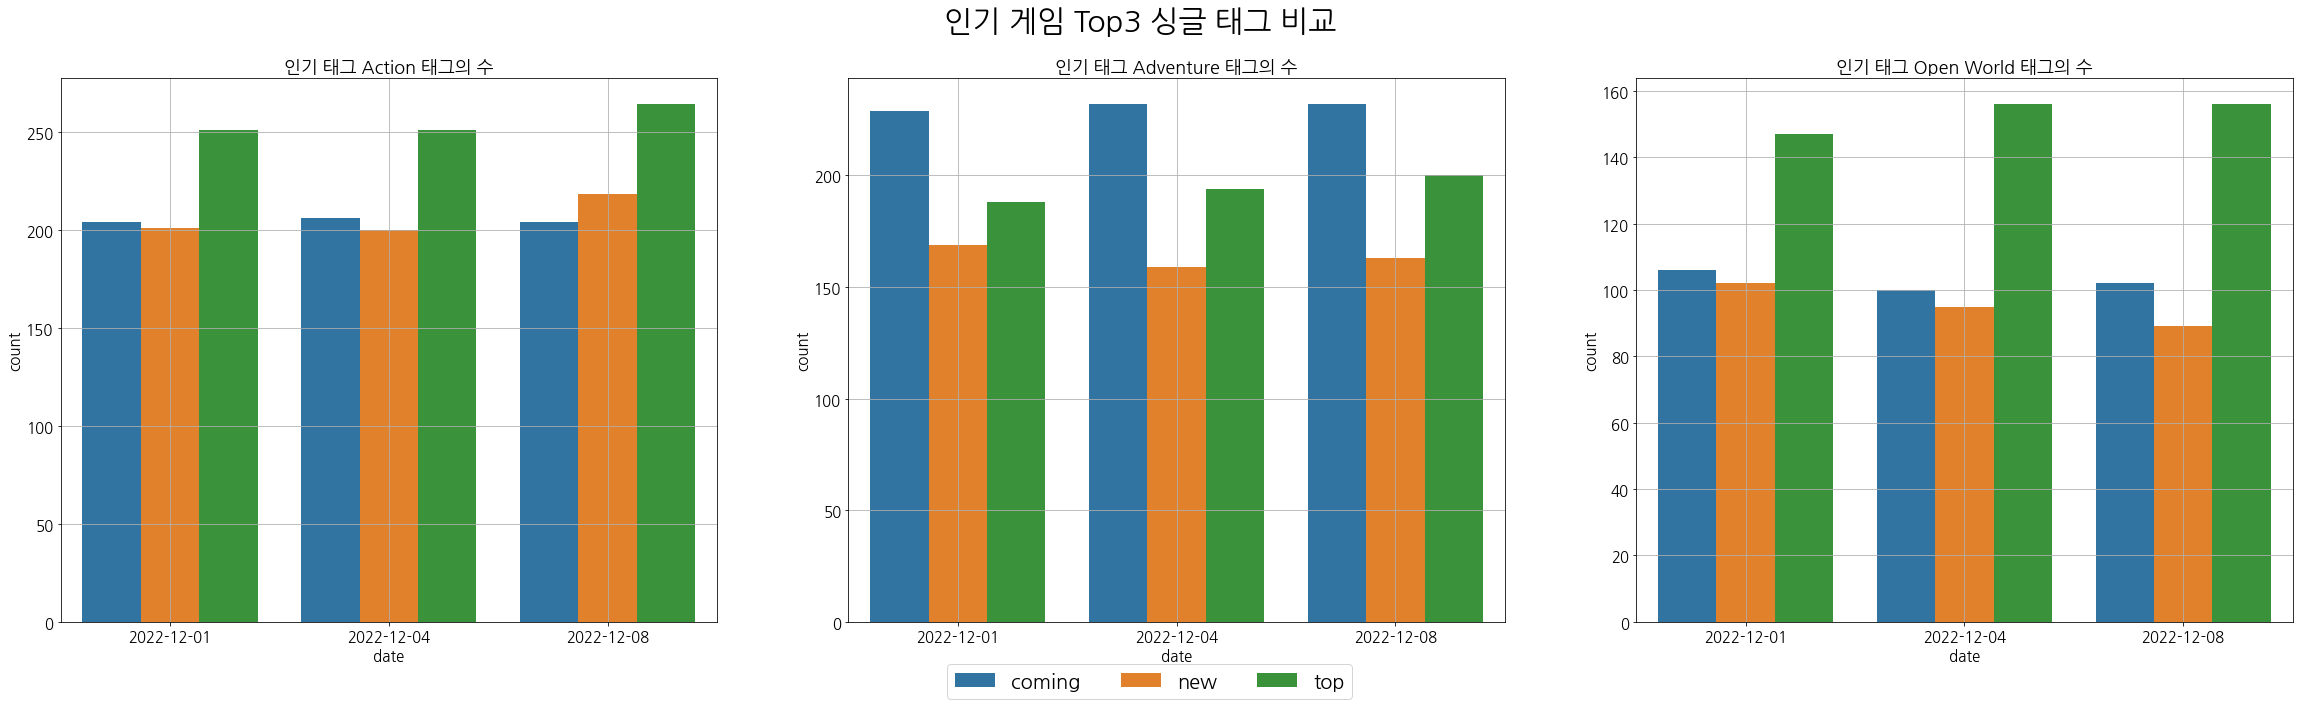

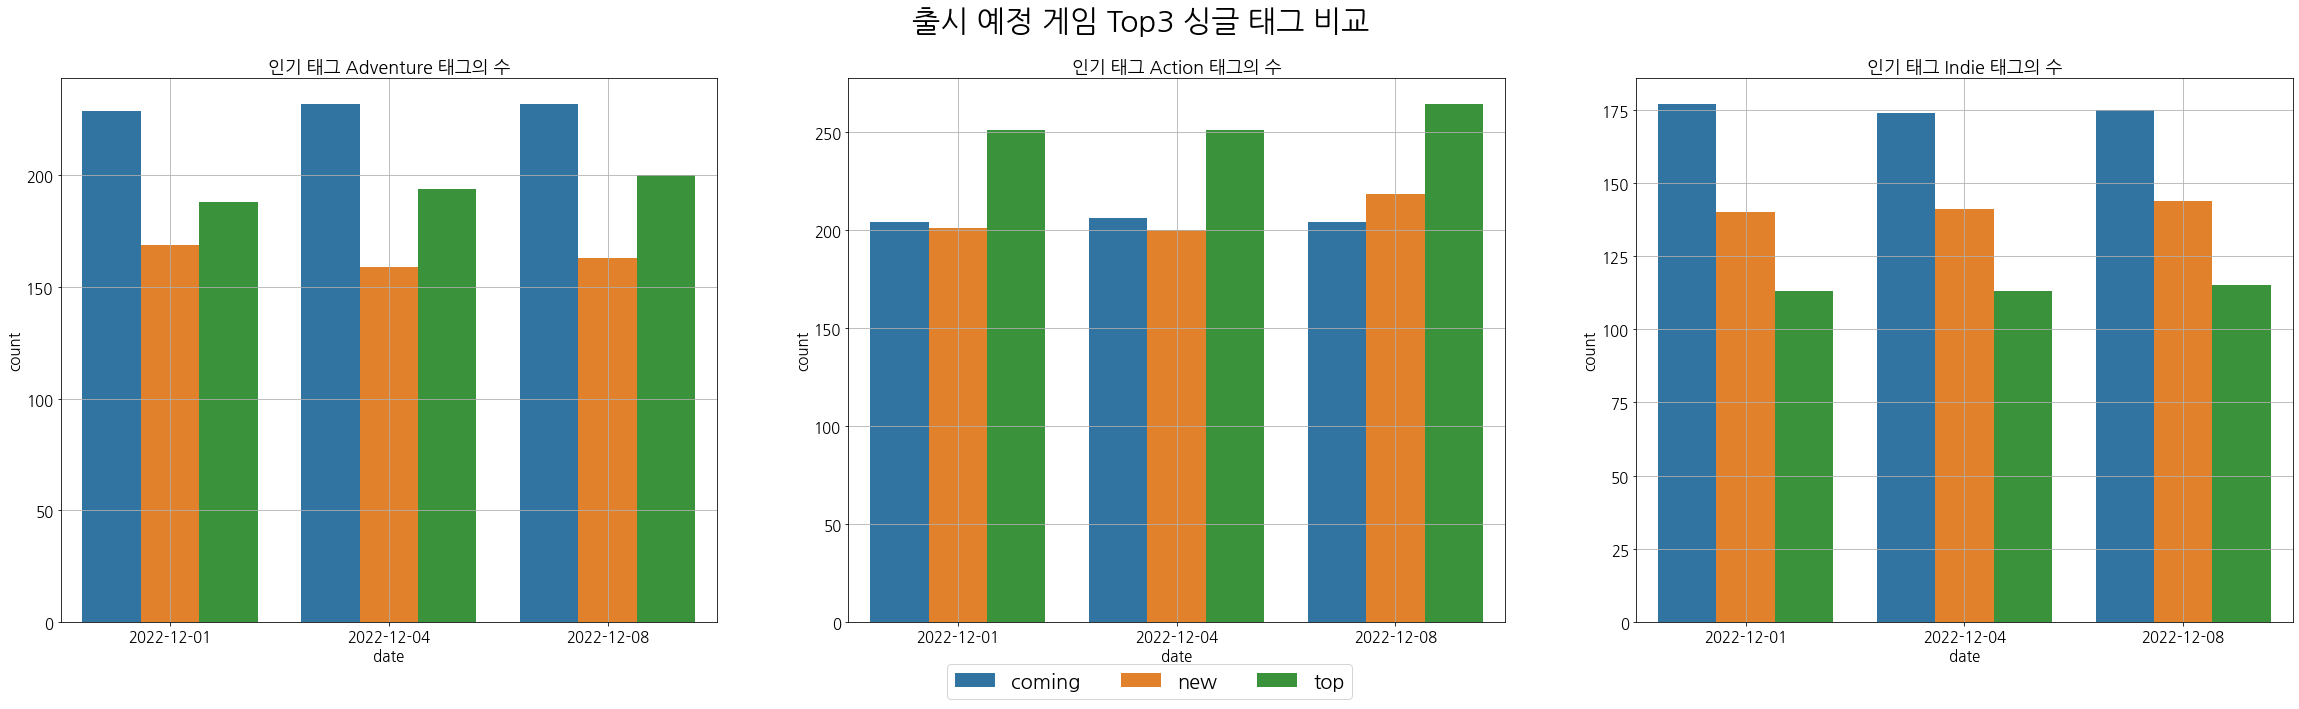

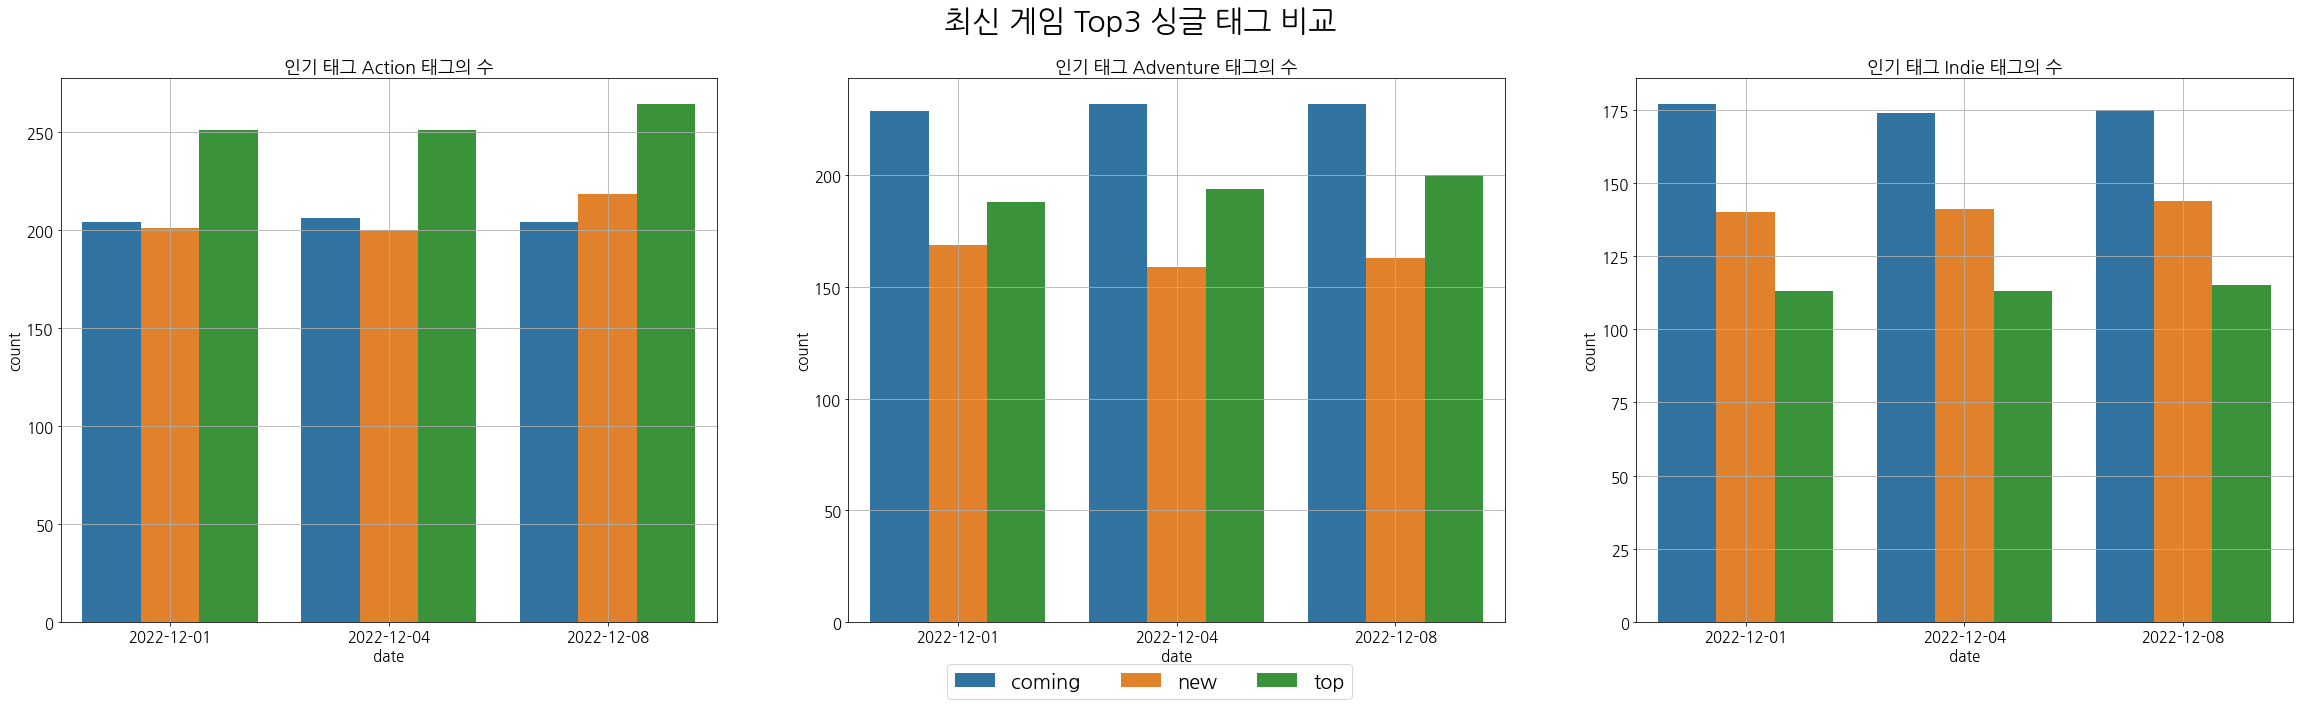

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font',size = 15)

new_single_df = pd.read_csv('/content/new_tag_single.csv')
coming_single_df = pd.read_csv('/content/coming_tag_single.csv')
top_single_df = pd.read_csv('/content/top_tag_single.csv')

deleteTag = ['Singleplayer','Multiplayer','Free to Play','Online Co-Op','Great Soundtrack'] #제거할 태그

for k in deleteTag:
  spec = new_single_df[new_single_df['tag'].str.contains(k)].index #deleteTag가 포함된 값 제거
  new_single_df.drop(spec,inplace=True)
  spec = coming_single_df[coming_single_df['tag'].str.contains(k)].index #deleteTag가 포함된 값 제거
  coming_single_df.drop(spec,inplace=True)
  spec = top_single_df[top_single_df['tag'].str.contains(k)].index #deleteTag가 포함된 값 제거
  top_single_df.drop(spec,inplace=True)

#현재 인기게임 최고 태그 구하기
mask=(top_single_df['date']=='2022-12-08') # 최다판매
top =  top_single_df[mask]
top = top.tag.value_counts().rename_axis('date').to_frame(name='top')
top_tag=top.sort_values(by=['top'],ascending=[False]).head(3).index #최다판매에서 가장 많은 수의 태그 추출

#현재 출시예정 최고 태그 구하기
mask=(coming_single_df['date']=='2022-12-08') # 최다판매
coming =  coming_single_df[mask]
coming = coming.tag.value_counts().rename_axis('date').to_frame(name='coming')
coming_tag=coming.sort_values(by=['coming'],ascending=[False]).head(3).index #최다판매에서 가장 많은 수의 태그 추출

#현재 최신게임 최고 태그 구하기
mask=(new_single_df['date']=='2022-12-08') # 최다판매
new =  new_single_df[mask]
new = new.tag.value_counts().rename_axis('date').to_frame(name='new')
new_tag=new.sort_values(by=['new'],ascending=[False]).head(3).index #최다판매에서 가장 많은 수의 태그 추출

#각 행에 '출시예정','신작','인기' 태그 넣기
coming_single_df['type'] = 'coming'
new_single_df['type'] = 'new'
top_single_df['type'] = 'top'

all_single_df = pd.concat([coming_single_df,new_single_df])
all_single_df = pd.concat([all_single_df, top_single_df])

all_single_df =  all_single_df[(all_single_df['date']=='2022-12-01') | (all_single_df['date']=='2022-12-04') | (all_single_df['date']=='2022-12-08') ]


fig=plt.figure(figsize=(40,10))

for i in range(0,3):
  top_single= all_single_df[all_single_df['tag']==top_tag.values[i]]
  ax = fig.add_subplot(1,3,i+1)
  ax = sns.countplot(x='date',hue='type', data=top_single)
  ax.set(title ='인기 태그 ' + top_tag.values[i] + ' 태그의 수')
  ax.get_legend().remove()
  ax.grid(True)

plt.figlegend(['coming','new','top'], loc = 'lower center', ncol=3,  prop={'size': 20})
fig.suptitle('인기 게임 Top3 싱글 태그 비교',fontsize=30)

fig.show()

fig1=plt.figure(figsize=(40,10))

for i in range(0,3):
  coming_single= all_single_df[all_single_df['tag']==coming_tag.values[i]]
  ax = fig1.add_subplot(1,3,i+1)
  ax = sns.countplot(x='date',hue='type', data=coming_single)
  ax.set(title ='인기 태그 ' + coming_tag.values[i] + ' 태그의 수')
  ax.get_legend().remove()
  ax.grid(True)
  
fig1.suptitle('출시 예정 게임 Top3 싱글 태그 비교',fontsize=30)
plt.figlegend(['coming','new','top'], loc = 'lower center', ncol=3,  prop={'size': 20})
fig1.show()

fig2=plt.figure(figsize=(40,10))

for i in range(0,3):
  new_single= all_single_df[all_single_df['tag']==new_tag.values[i]]
  ax = fig2.add_subplot(1,3,i+1)
  ax = sns.countplot(x='date',hue='type', data=new_single)
  ax.set(title ='인기 태그 ' + new_tag.values[i] + ' 태그의 수')
  ax.get_legend().remove()
  ax.grid(True)
  
fig2.suptitle('최신 게임 Top3 싱글 태그 비교',fontsize=30)
plt.figlegend(['coming','new','top'], loc = 'lower center', ncol=3,  prop={'size': 20})
fig2.show()

## 인기 게임 더블 태그 최신, 출시예정 비교

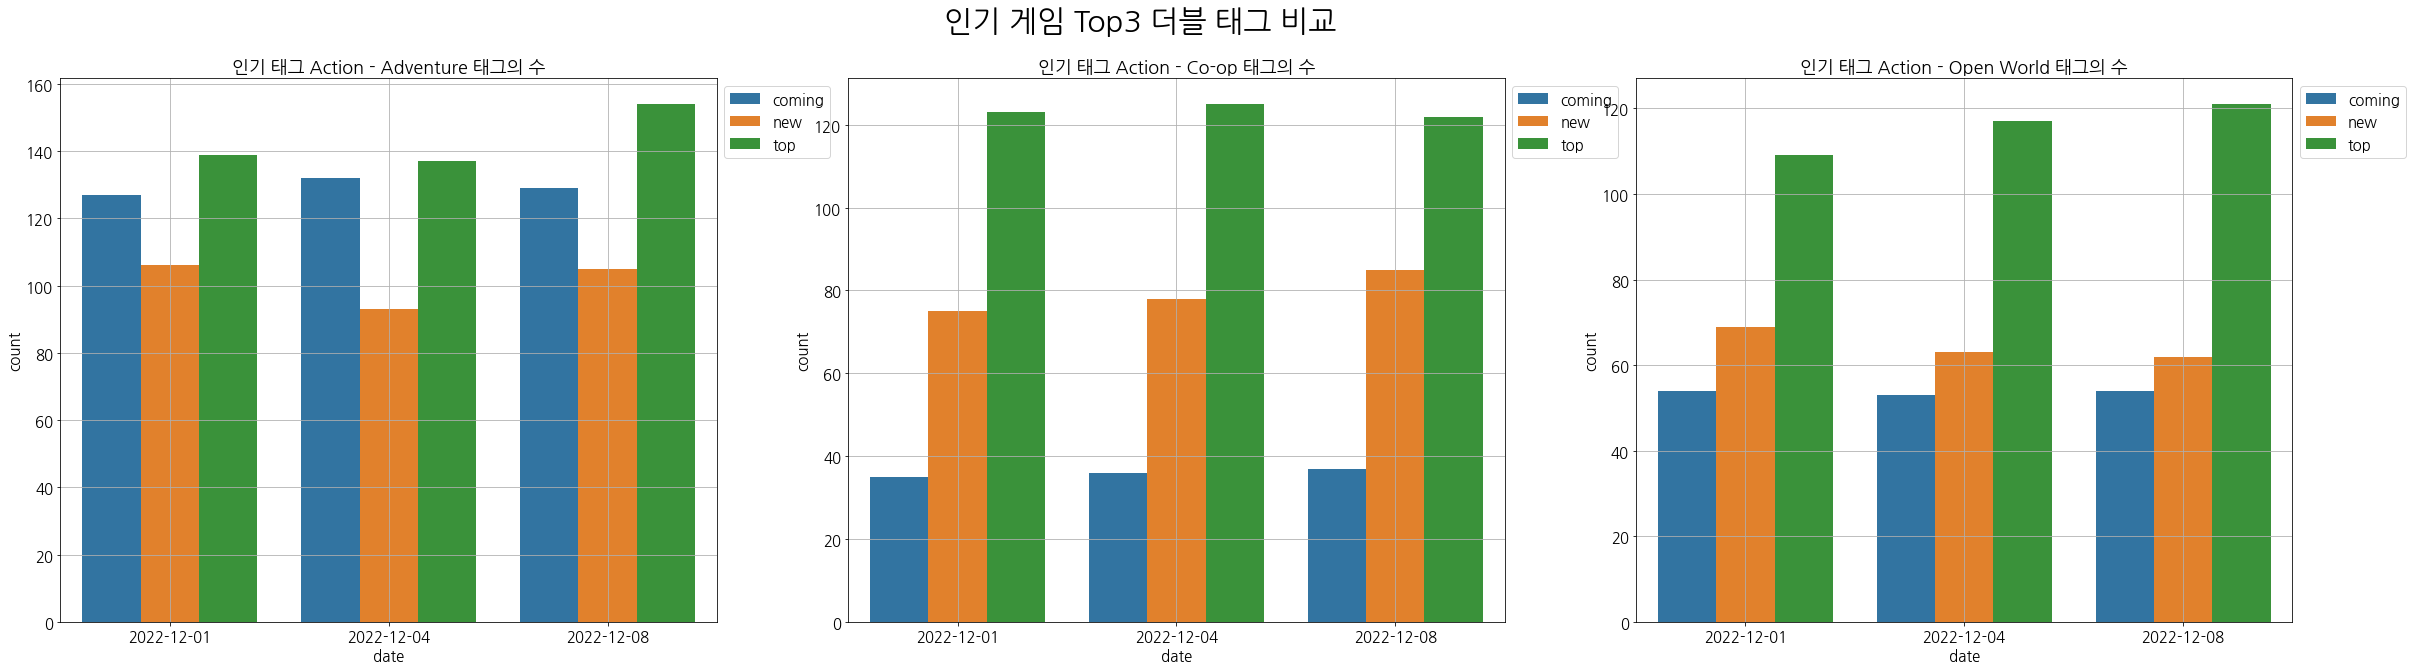

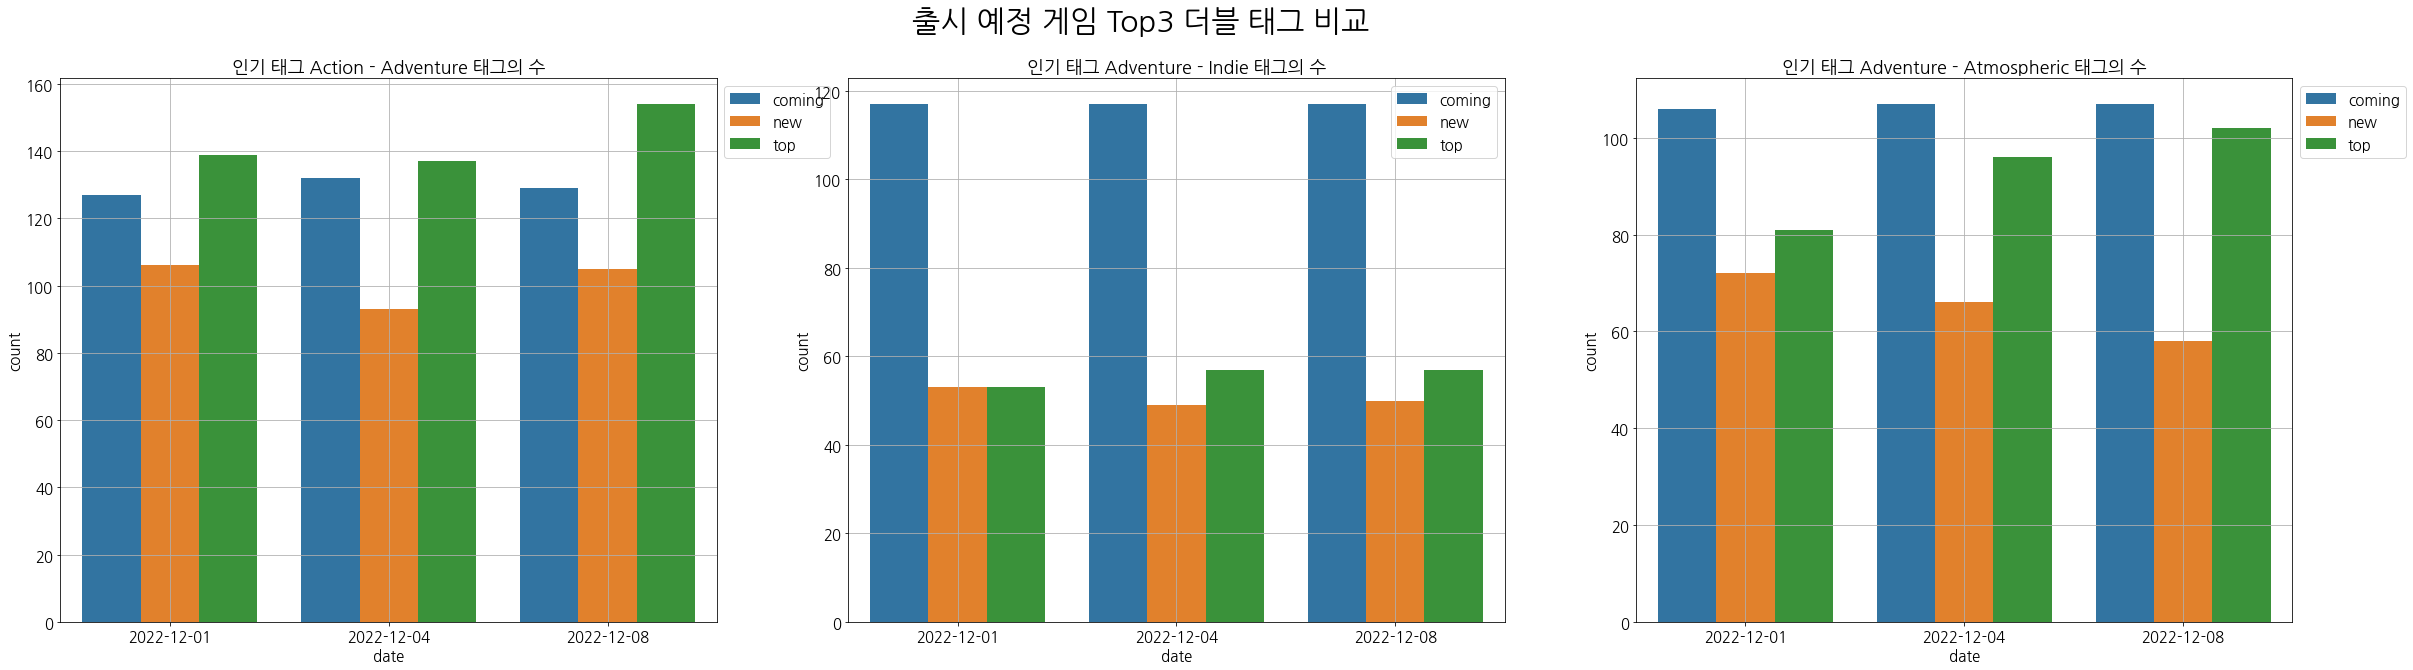

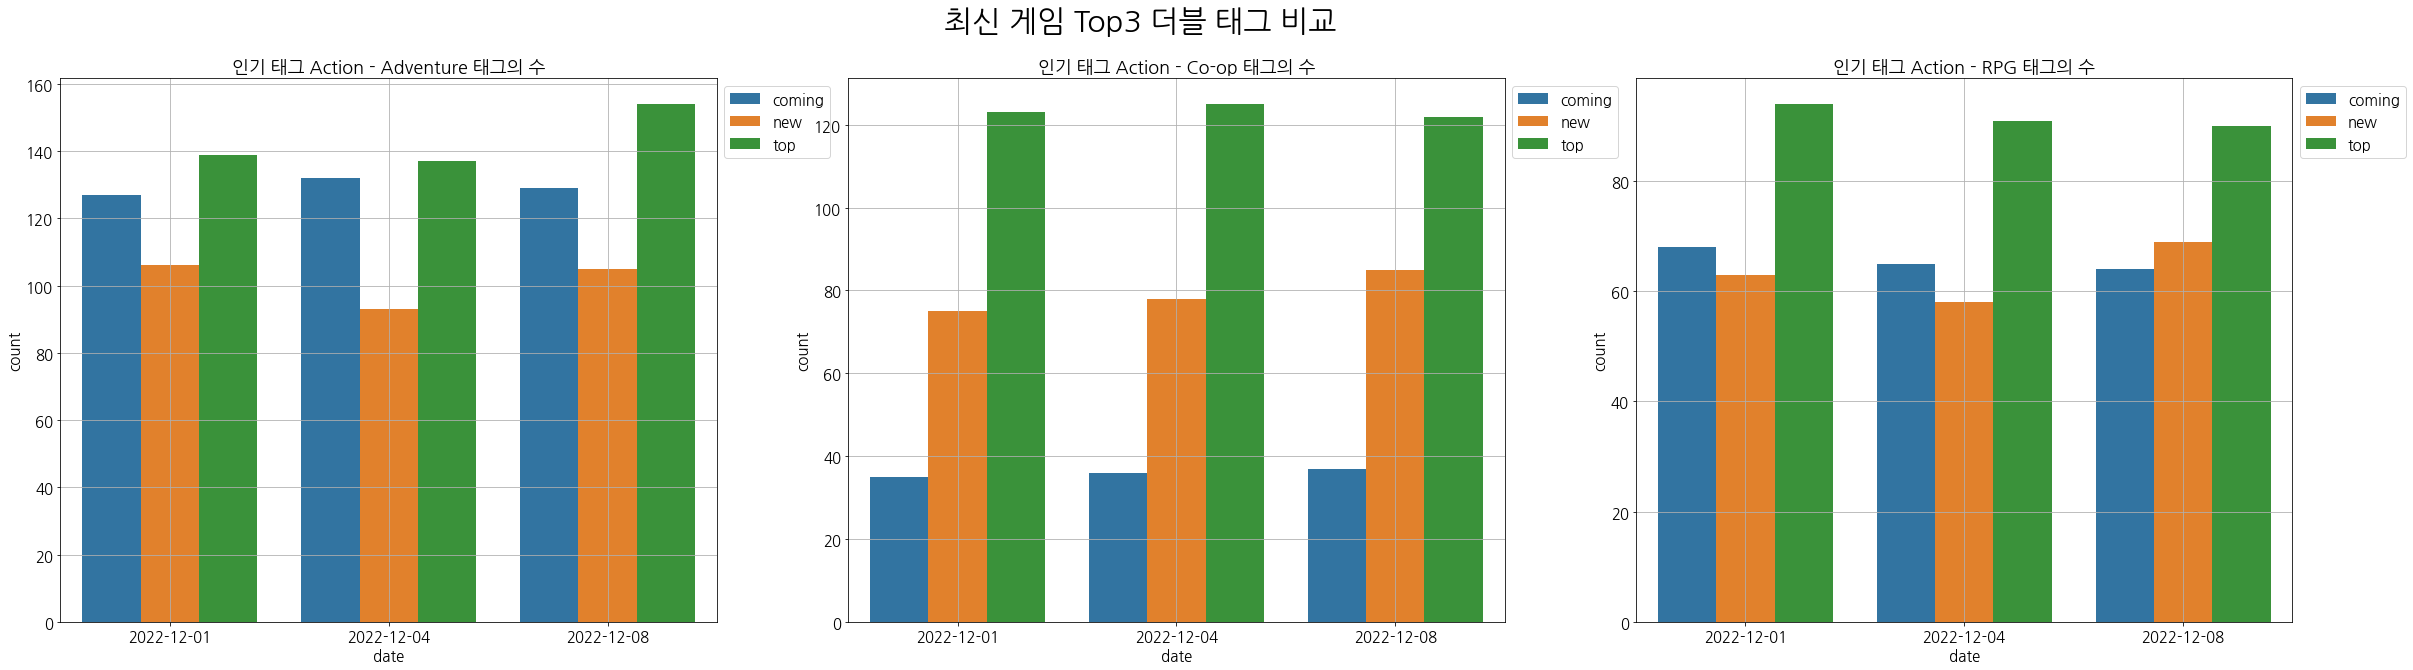

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.rc('font',size = 15)

new_double_df = pd.read_csv('/content/new_tag_double.csv')
coming_double_df = pd.read_csv('/content/coming_tag_double.csv')
top_double_df = pd.read_csv('/content/top_tag_double.csv')

deleteTag = ['Singleplayer','Multiplayer','Free to Play','Online Co-Op','Great Soundtrack'] #제거할 태그

for k in deleteTag:
  spec = new_double_df[new_double_df['tag'].str.contains(k)].index #deleteTag가 포함된 값 제거
  new_double_df.drop(spec,inplace=True)
  spec = coming_double_df[coming_double_df['tag'].str.contains(k)].index #deleteTag가 포함된 값 제거새ㅔ
  coming_double_df.drop(spec,inplace=True)
  spec = top_double_df[top_double_df['tag'].str.contains(k)].index #deleteTag가 포함된 값 제거
  top_double_df.drop(spec,inplace=True)

#현재 인기게임 최고 더블 태그 구하기
mask=(top_double_df['date']=='2022-12-08') # 최다판매
top =  top_double_df[mask]
top = top.tag.value_counts().rename_axis('date').to_frame(name='top')
top_tag=top.sort_values(by=['top'],ascending=[False]).head(3).index #최다판매에서 가장 많은 수의 태그 추출

#현재 출시예정 최고 더블 태그 구하기
mask=(coming_double_df['date']=='2022-12-08') # 최다판매
coming =  coming_double_df[mask]
coming = coming.tag.value_counts().rename_axis('date').to_frame(name='coming')
coming_tag=coming.sort_values(by=['coming'],ascending=[False]).head(3).index #최다판매에서 가장 많은 수의 태그 추출

#현재 최신게임 최고 더블 태그 구하기
mask=(new_double_df['date']=='2022-12-08') # 최다판매
new =  new_double_df[mask]
new = new.tag.value_counts().rename_axis('date').to_frame(name='new')
new_tag=new.sort_values(by=['new'],ascending=[False]).head(3).index #최다판매에서 가장 많은 수의 태그 추출

#각 행에 '출시예정','신작','인기' 태그 넣기

coming_double_df['type'] = 'coming'
new_double_df['type'] = 'new'
top_double_df['type'] = 'top'

all_double_df = pd.concat([coming_double_df,new_double_df])
all_double_df = pd.concat([all_double_df, top_double_df])

all_double_df =  all_double_df[(all_double_df['date']=='2022-12-01') | (all_double_df['date']=='2022-12-04') | (all_double_df['date']=='2022-12-08') ]


fig=plt.figure(figsize=(40,10))

for i in range(0,3):
  top_double= all_double_df[all_double_df['tag']==top_tag.values[i]]
  ax = fig.add_subplot(1,3,i+1)
  ax = sns.countplot(x='date',hue='type', data=top_double)
  ax.set(title ='인기 태그 ' + top_tag.values[i] + ' 태그의 수')
  ax.legend(bbox_to_anchor=(1, 1))
  ax.grid(True)

fig.suptitle('인기 게임 Top3 더블 태그 비교',fontsize=30)

fig.show()

fig1=plt.figure(figsize=(40,10))

for i in range(0,3):
  coming_double= all_double_df[all_double_df['tag']==coming_tag.values[i]]
  ax = fig1.add_subplot(1,3,i+1)
  ax = sns.countplot(x='date',hue='type', data=coming_double)
  ax.set(title ='인기 태그 ' + coming_tag.values[i] + ' 태그의 수')
  ax.legend(bbox_to_anchor=(1, 1))
  ax.grid(True)
  
fig1.suptitle('출시 예정 게임 Top3 더블 태그 비교',fontsize=30)

fig1.show()

fig2=plt.figure(figsize=(40,10))

for i in range(0,3):
  new_double= all_double_df[all_double_df['tag']==new_tag.values[i]]
  ax = fig2.add_subplot(1,3,i+1)
  ax = sns.countplot(x='date',hue='type', data=new_double)
  ax.set(title ='인기 태그 ' + new_tag.values[i] + ' 태그의 수')
  ax.legend(bbox_to_anchor=(1, 1))
  ax.grid(True)
  
fig2.suptitle('최신 게임 Top3 더블 태그 비교',fontsize=30)

fig2.show()




## 인기 게임 순위 변동 분석

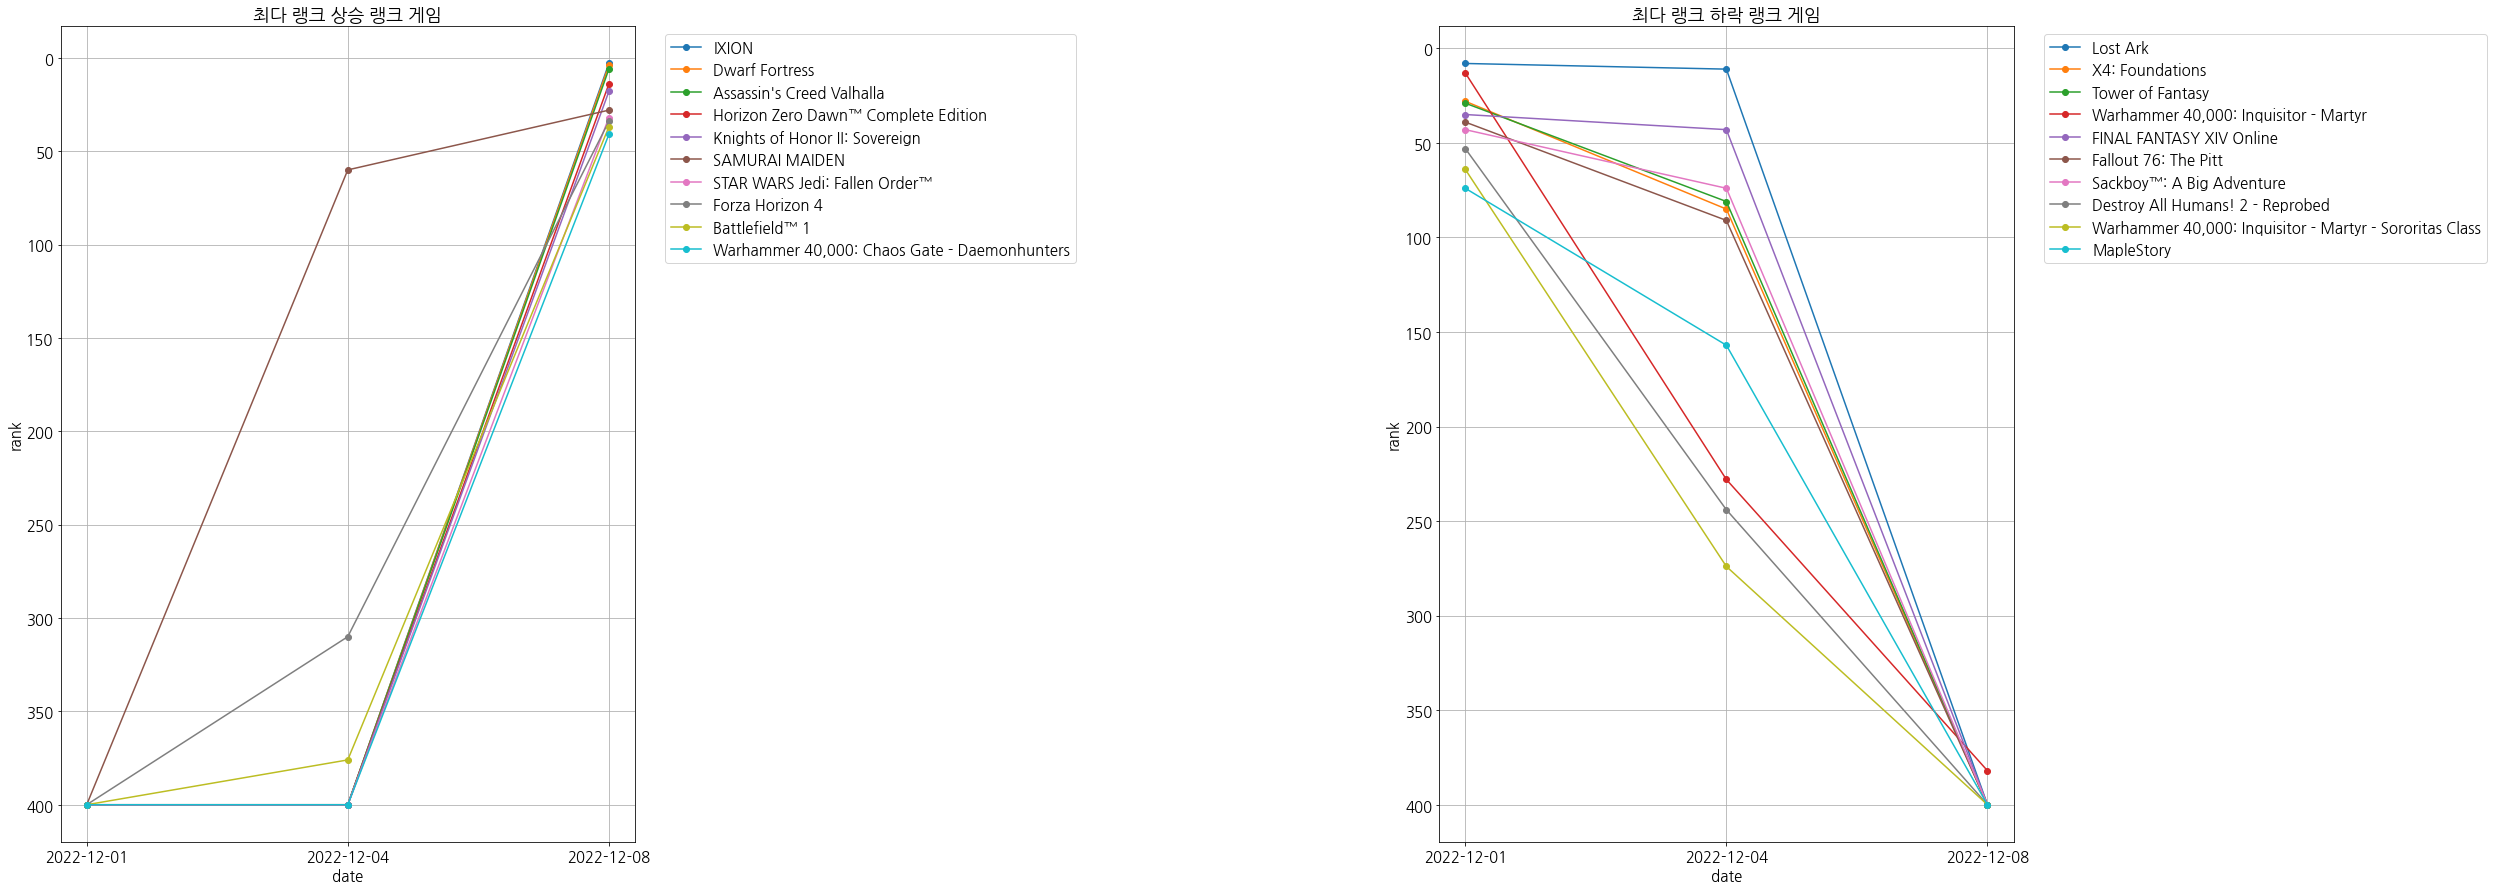

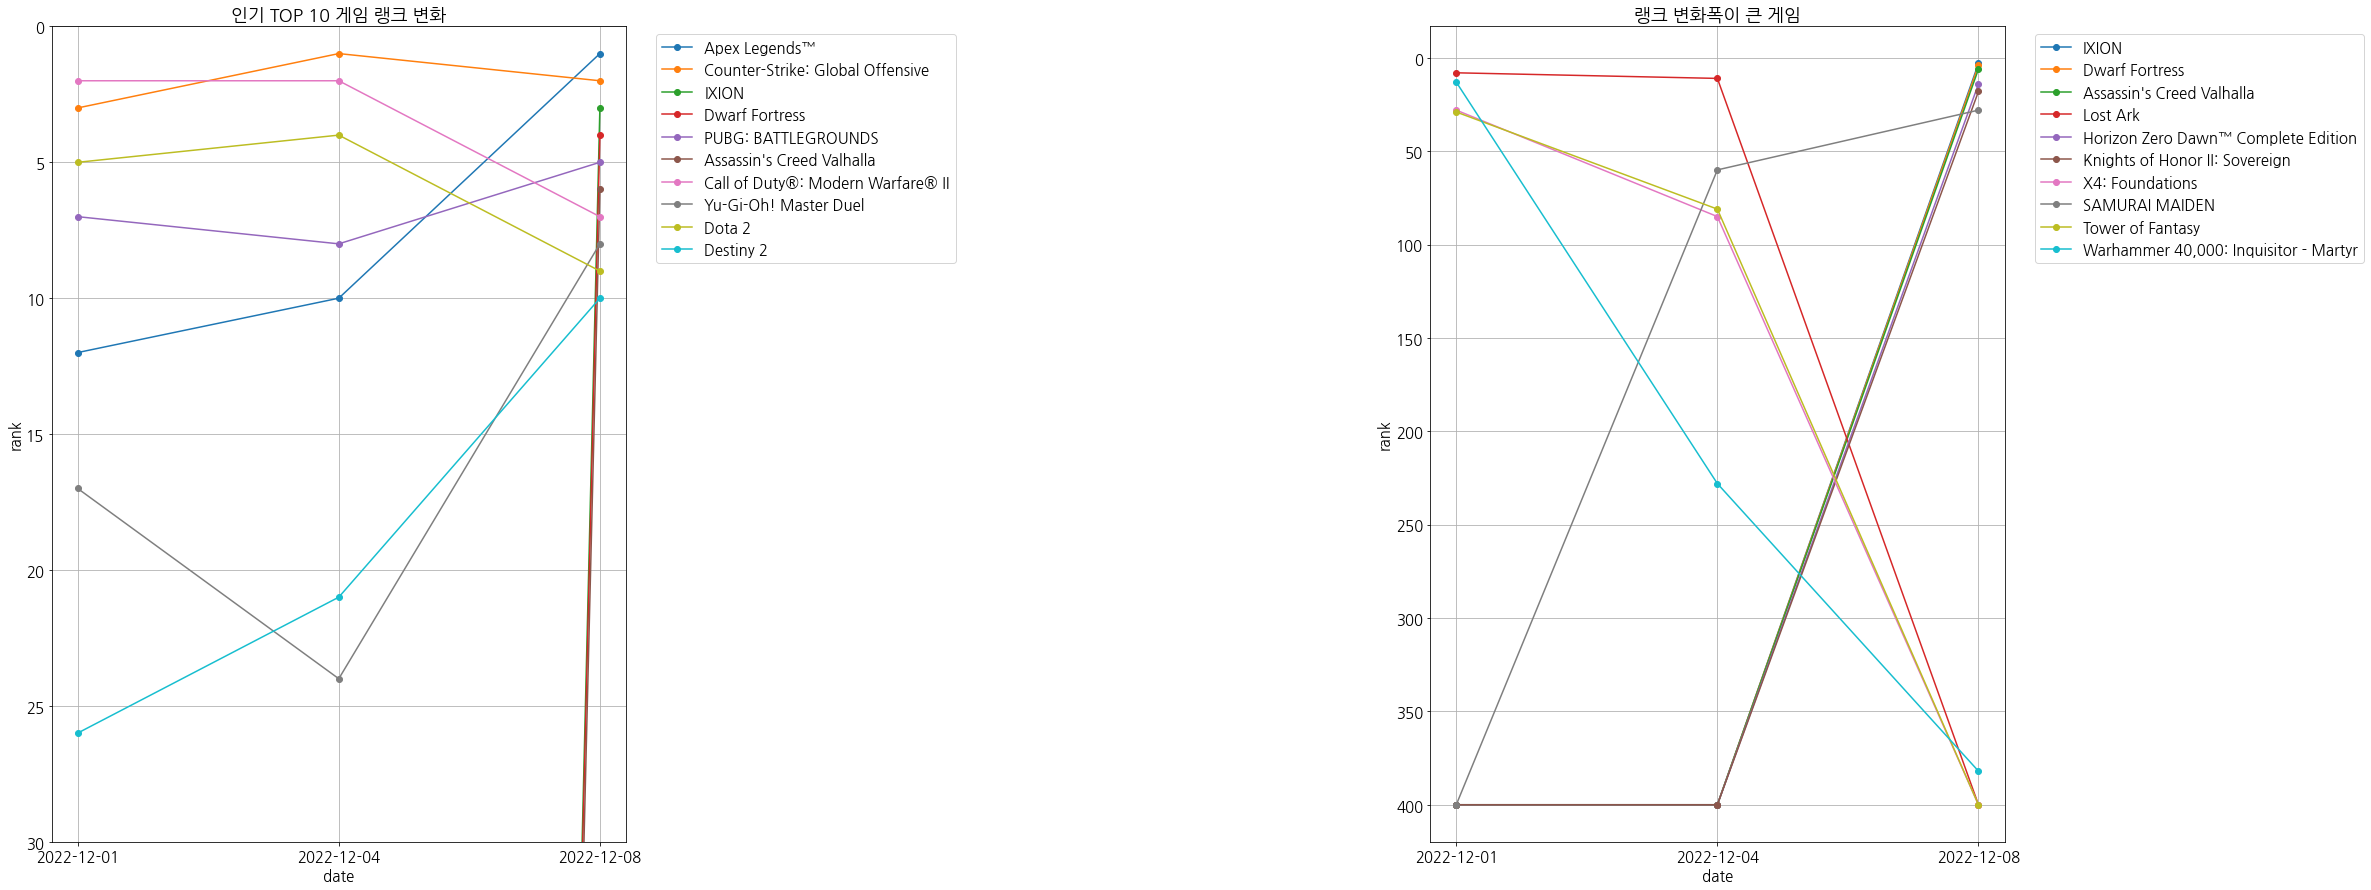

In [27]:
import matplotlib.pyplot as plt
plt.rc('font',size = 15)

top_rank_df = pd.read_csv('/content/top_rank.csv')

#순위 정보 가져오기
mask=(top_rank_df['date']=='2022-12-01') 
former =  top_rank_df[mask].drop(['date'],axis=1)
mask=(top_rank_df['date']=='2022-12-04') 
middle =  top_rank_df[mask].drop(['date'],axis=1)
mask=(top_rank_df['date']=='2022-12-08') 
now =  top_rank_df[mask].drop(['date'],axis=1)

former.rename(columns={'rank':'2022-12-01'},inplace=True)
middle.rename(columns={'rank':'2022-12-04'},inplace=True)
now.rename(columns={'rank':'2022-12-08'},inplace=True)


compare=''
compare = pd.merge(former, middle, how='outer', on=['title'])
compare = pd.merge(compare,now, how='outer', on=['title'])

compare = compare.fillna(400) #Nan값은 400위 밖이라는 뜻이므로 모두 400으로 변경
#차이를 구하기위해 데이터형식을 바꿔줌
compare['2022-12-08'] = pd.to_numeric(compare['2022-12-08'])
compare['2022-12-01'] = pd.to_numeric(compare['2022-12-01'])
compare['2022-12-04'] = pd.to_numeric(compare['2022-12-04'])

compare.set_index('title',inplace=True)

compare['compare']=compare['2022-12-01'] - compare['2022-12-08'] #전주와 현재의 태그 수의 차이를 넣는 컬럼 추가
top_compare_rank=compare.sort_values(by=['compare'],ascending=[False]).head(10) #가장 많이 랭크가 오른 게임
bottom_compare_rank=compare.sort_values(by=['compare'],ascending=[True]).head(10) #가장 많이 랭크가 내려간 게임

fig=plt.figure(figsize=(35,15))

top_compare_rank = top_compare_rank.drop(['compare'],axis=1).transpose()
ax1=fig.add_subplot(1,3,1)
ax1.set_title('최다 랭크 상승 랭크 게임')
ax1.plot(top_compare_rank.index,top_compare_rank.values, marker='o')
ax1.grid(True)
ax1.legend(bbox_to_anchor=(1.04, 1), labels=top_compare_rank.columns)
ax1.set(ylabel='rank',xlabel='date')
ax1.invert_yaxis()

bottom_compare_rank = bottom_compare_rank.drop(['compare'],axis=1).transpose()
ax2=fig.add_subplot(1,3,3)
ax2.set_title('최다 랭크 하락 랭크 게임')
ax2.plot(bottom_compare_rank.index,bottom_compare_rank.values, marker='o')
ax2.grid(True)
ax2.legend(bbox_to_anchor=(1.04, 1), labels=bottom_compare_rank.columns)
ax2.set(ylabel='rank',xlabel='date')
ax2.invert_yaxis()

fig.show()

fig2=plt.figure(figsize=(35,15))

top_rank_10 = compare.sort_values(by=['2022-12-08'],ascending=[True]).head(10)
top_rank_10 = top_rank_10.transpose()
top_rank_10 = top_rank_10.drop(['compare'])

ax3=fig2.add_subplot(1,3,1)
ax3.set_title('인기 TOP 10 게임 랭크 변화')
ax3.plot(top_rank_10.index,top_rank_10.values, marker='o')
ax3.grid(True)
ax3.legend(bbox_to_anchor=(1.04, 1), labels=top_rank_10.columns)
ax3.set(ylabel='rank',xlabel='date')
ax3.set_ylim(0,30)
ax3.invert_yaxis()

def absolute(x): # 변화값의 절대값을 구하기 위한 함수
  if(x<0):
    return -x
  return x

compare['compare']=compare.apply(lambda x:absolute(x['compare']),axis=1) #랭크 변화값 절대값
compare= compare.sort_values(by='compare',ascending=[False]).head(10) #랭크 변화가 큰 게임 10개
compare = compare.transpose() #그래프 표현을 위해 행 열 바꾸기
compare = compare.drop(['compare'])

ax4=fig2.add_subplot(1,3,3)
ax4.set_title('랭크 변화폭이 큰 게임')
ax4.plot(compare.index,compare.values, marker='o')
ax4.grid(True)
ax4.legend(bbox_to_anchor=(1.04, 1), labels=compare.columns)
ax4.set(ylabel='rank',xlabel='date')
ax4.invert_yaxis()

fig2.show()

